In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
X = pd.read_csv('Data/diabetic_data.csv')

In [3]:
X

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                      1  ...          No      No                   No   
1                      3  ...          No      Up                   No   
2                      2  ...          No      No                   No   
3                      2  ...          No      Up                   No   
4                      1  ...          No  Steady                   No   
...                  ...  ...         ...     ...                  ...   
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
0                        No                        No   
1                        No                        No   
2                        No                        No   
3                        No                        No   
4                        No                        No   
...                     ...                       ...   
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
0                            No                      No      No          No   
1                            No                      No      Ch         Yes   
2                            No                      No      No         Yes   
3                            No                      No      Ch         Yes   
4                            No                      No      Ch         Yes   
...                         ...                     ...     ...         ...   
101761                       No

In [4]:
X.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [5]:
X.shape

(101766, 50)

In [6]:
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)
print(len(non_numeric_columns))

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
37


In [7]:
drop_list = []
for col in X.columns:
    X[col].replace('?', None, inplace = True)
    #X[col].replace('NaN', 0, inplace = True)
    #X[col].replace('None', 0, inplace = True)
    
    val_counts = X[col].value_counts()
    if val_counts.iloc[0] / val_counts.sum() > 0.8:
        drop_list.append(col)

for elem in drop_list:
    X.drop([elem], axis = 1, inplace = True)

In [8]:
X.shape

(101766, 26)

In [9]:
for val in list(set(X['age'].values)):
    X['age'].replace(val, val[-3:-1], inplace = True)

X['age'].replace('00', 100, inplace = True)

for val in list(set(X['age'].values)):
    X['age'].replace(val, int(val), inplace = True)

In [10]:
#prepare diabetesMed column
for val in list(set(X['diag_1'].values)):
    if val != None and val[0].isalpha():
        X['diag_1'].replace(val, None, inplace = True)
    elif val ==None:
        pass
    else:
        X['diag_1'].replace(val, float(val), inplace = True)

for val in list(set(X['diag_2'].values)):
    if val != None and val[0].isalpha():
        X['diag_2'].replace(val, None, inplace = True)
    elif val ==None:
        pass
    else:
        X['diag_2'].replace(val, float(val), inplace = True)

for val in list(set(X['diag_3'].values)):
    if val != None and val[0].isalpha():
        X['diag_3'].replace(val, None, inplace = True)
    elif val ==None:
        pass
    else:
        X['diag_3'].replace(val, float(val), inplace = True)

In [11]:
#REMOVE UNNECESSARY COLUMNS
X.drop(['encounter_id','patient_nbr','payer_code', 'weight'], axis = 1, inplace = True)

In [12]:
# List of columns to exclude from conversion
exclude_columns = ['race', 'gender', 'medical_specialty', 'readmitted', 'insulin', 'change']

# Iterate through all columns in the DataFrame
for col in X.columns:
    if col not in exclude_columns:
        # Convert columns to numeric and handle NaN by filling with 0 or appropriate value
        X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0).astype(int)  # Coerce non-numeric to NaN and fill NaN with 0

In [13]:
X.dtypes

race                        object
gender                      object
age                          int32
admission_type_id            int32
discharge_disposition_id     int32
admission_source_id          int32
time_in_hospital             int32
medical_specialty           object
num_lab_procedures           int32
num_procedures               int32
num_medications              int32
number_inpatient             int32
diag_1                       int32
diag_2                       int32
diag_3                       int32
number_diagnoses             int32
max_glu_serum                int32
A1Cresult                    int32
insulin                     object
change                      object
diabetesMed                  int32
readmitted                  object
dtype: object

In [14]:
X

race  gender  age  admission_type_id  \
0             Caucasian  Female   10                  6   
1             Caucasian  Female   20                  1   
2       AfricanAmerican  Female   30                  1   
3             Caucasian    Male   40                  1   
4             Caucasian    Male   50                  1   
...                 ...     ...  ...                ...   
101761  AfricanAmerican    Male   80                  1   
101762  AfricanAmerican  Female   90                  1   
101763        Caucasian    Male   80                  1   
101764        Caucasian  Female   90                  2   
101765        Caucasian    Male   80                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             25                    1                 1   
1                              1                    7                 3   
2                              1                    7                 2   
3                              1                    7                 2   
4                              1                    7                 1   
...                          ...                  ...               ...   
101761                         3                    7                 3   
101762                         4                    5                 5   
101763                         1                    7                 1   
101764                         3                    7                10   
101765                         1                    7                 6   

               medical_specialty  num_lab_procedures  num_procedures  ...  \
0       Pediatrics-Endocrinology                  41               0  ...   
1                           None                  59               0  ...   
2                           None                  11               5  ...   
3                           None                  44               1  ...   
4                           None                  51               0  ...   
...                          ...                 ...             ...  ...   
101761                      None                  51               0  ...   
101762                      None                  33               3  ...   
101763                      None                  53               0  ...   
101764           Surgery-General                  45               2  ...   
101765                      None                  13               3  ...   

        diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  \
0          250       0       0                 1              0          0   
1          276     250     255                 9              0          0   
2          648     250       0                 6              0          0   
3            8     250     403                 7              0          0   
4          197     157     250                 5              0          0   
...        ...     ...     ...               ...            ...        ...   
101761     250     291     458                 9              0          0   
101762     560     276     787                 9              0          0   
101763      38     590     296                13              0          0   
101764     996     285     998                 9              0          0   
101765     530     530     787                 9              0          0   

        insulin  change diabetesMed readmitted  
0            No      No           0         NO  
1            Up      Ch           0        >30  
2            No      No           0         NO  
3            Up      Ch           0         NO  
4        Steady      Ch           0         NO  
...         ...     ...         ...        ...  
101761     Down      Ch           0        >30  
101762   Steady      No           0         NO  
101763     Down      Ch           0         NO  
101764       Up      Ch           0         NO  
101765  

In [15]:
#Visualization

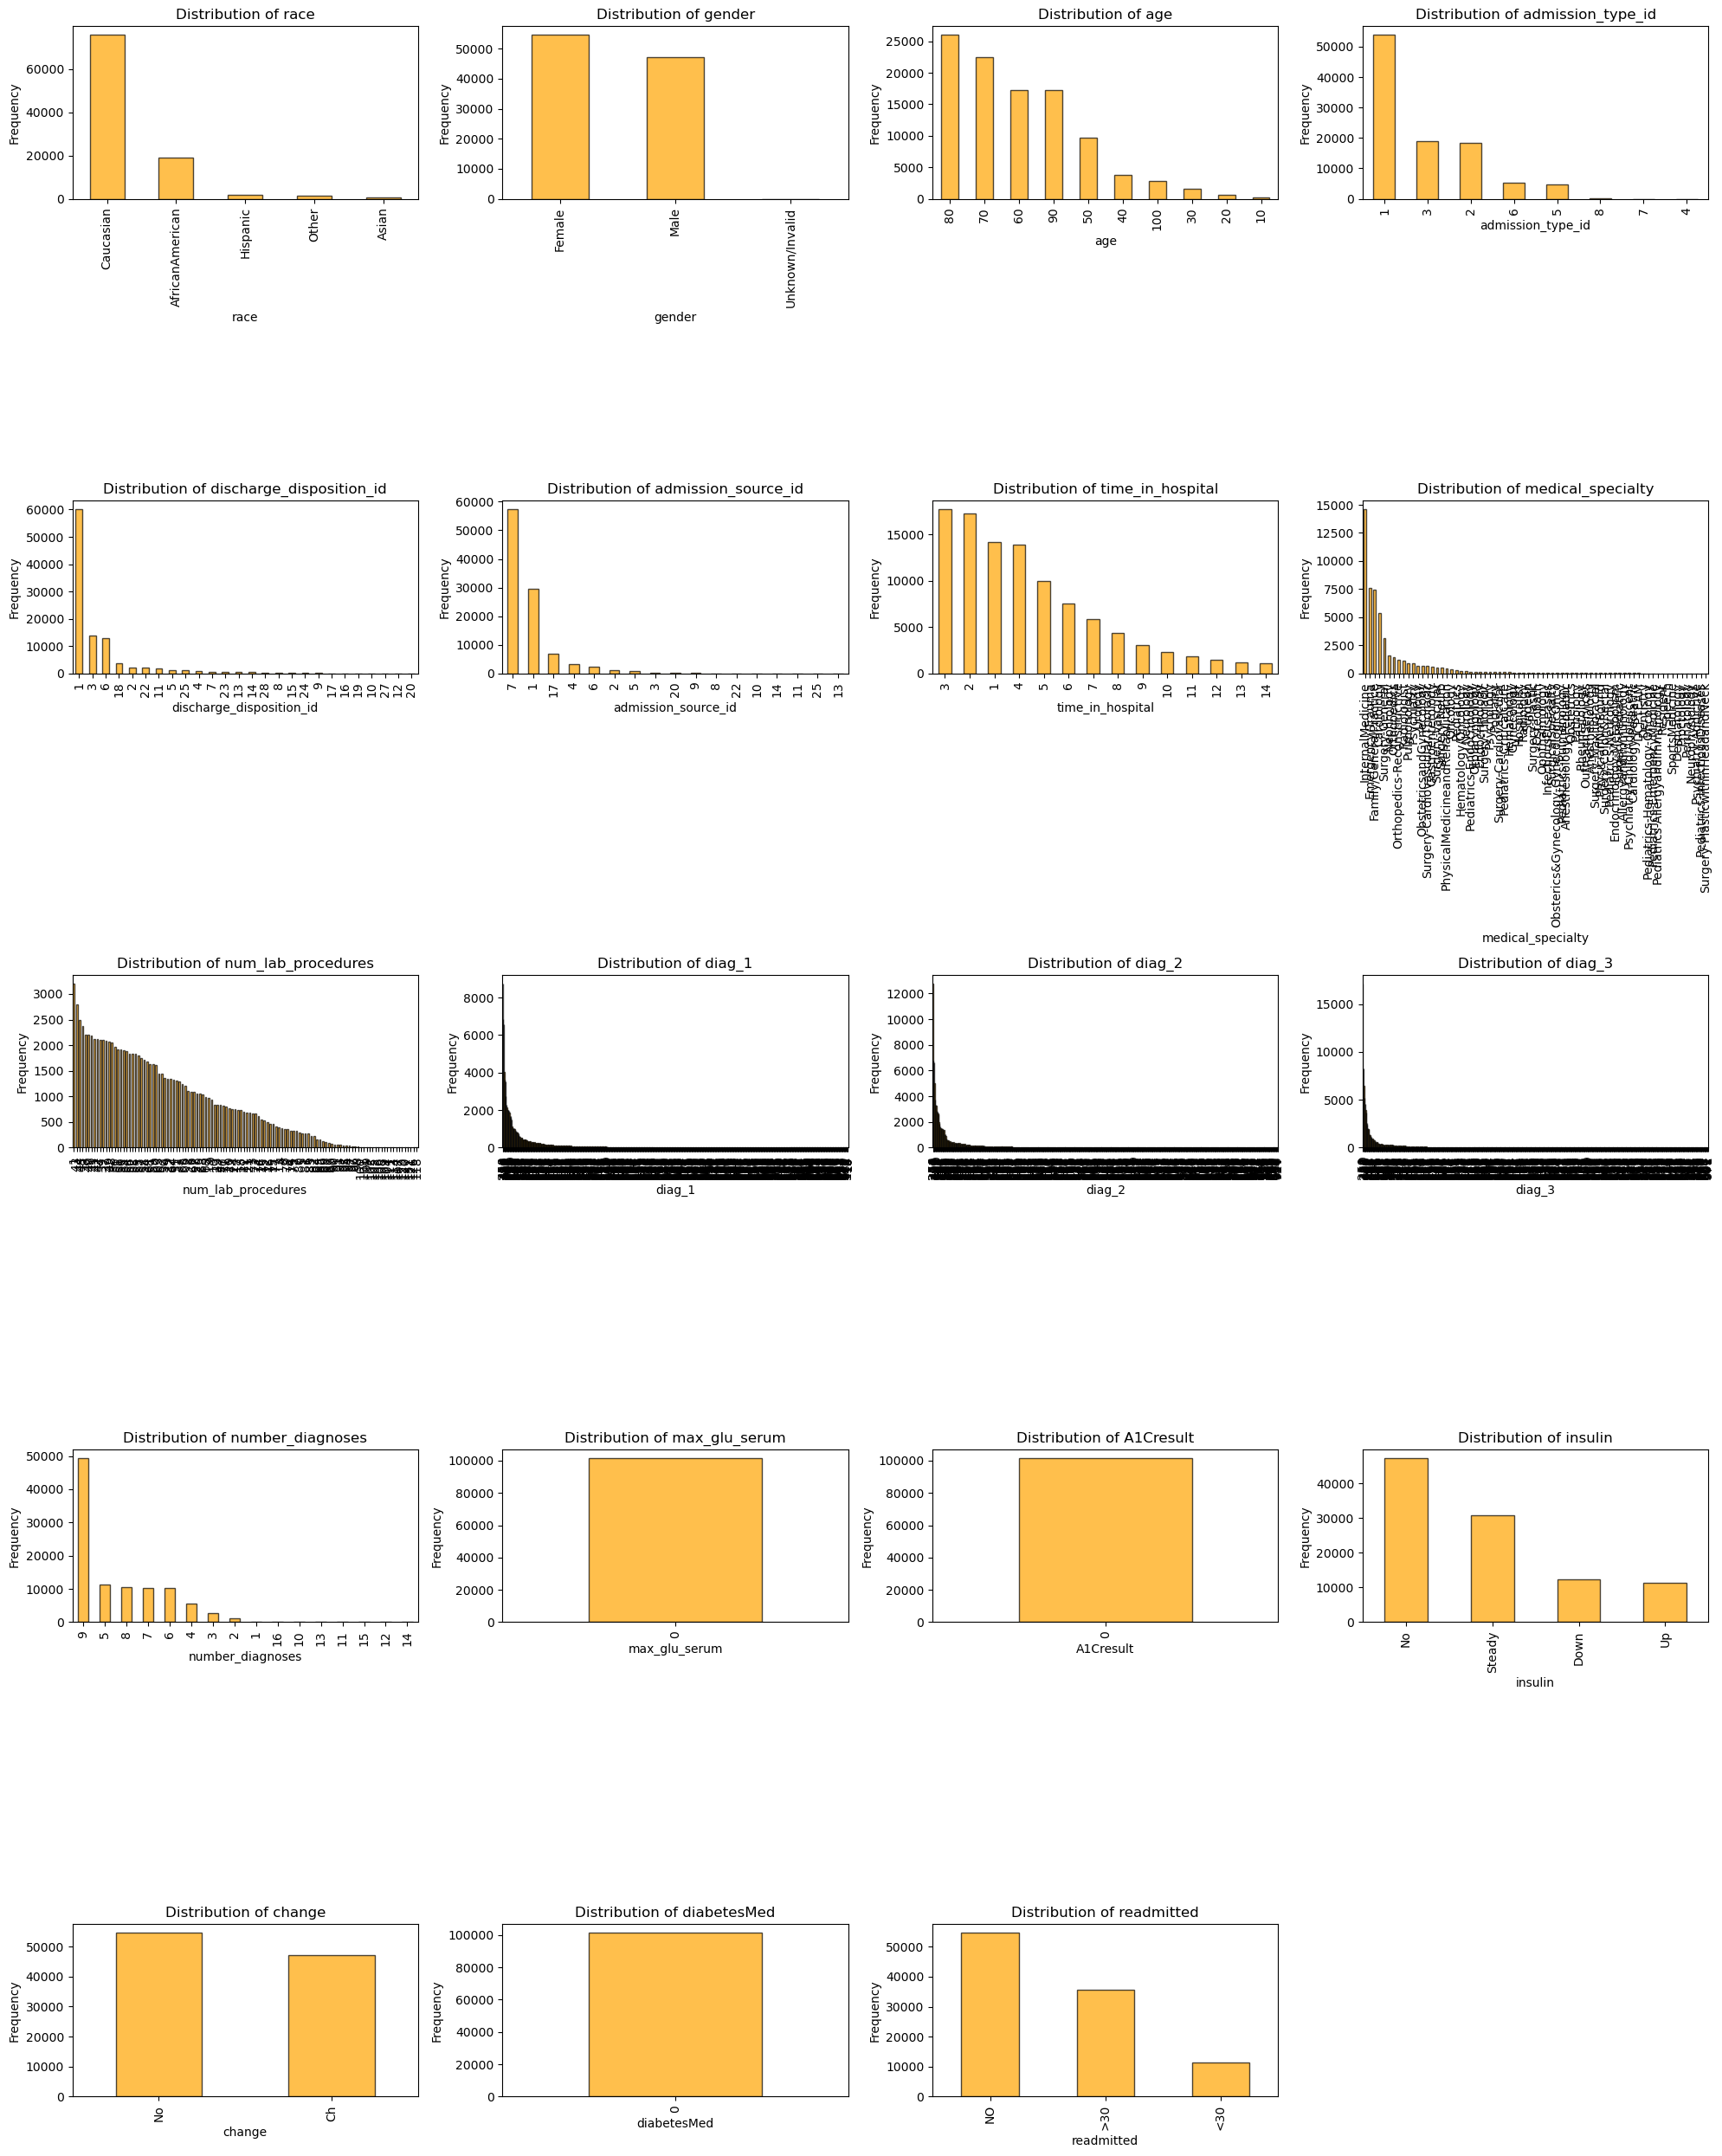

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Columns to plot (with their data types from the provided information)
columns_to_plot = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
    'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
    'insulin', 'change', 'diabetesMed', 'readmitted'
]

# Determine grid size
num_cols = 4
num_rows = int(np.ceil(len(columns_to_plot) / num_cols))

# Set up the grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    if X[col].dtype in ['int64', 'float64']:  # Numeric data
        ax.hist(X[col], bins=10, color='blue', alpha=0.7, edgecolor='black')
    else:  # Categorical data
        X[col].value_counts().plot(kind='bar', ax=ax, color='orange', alpha=0.7, edgecolor='black')
    
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


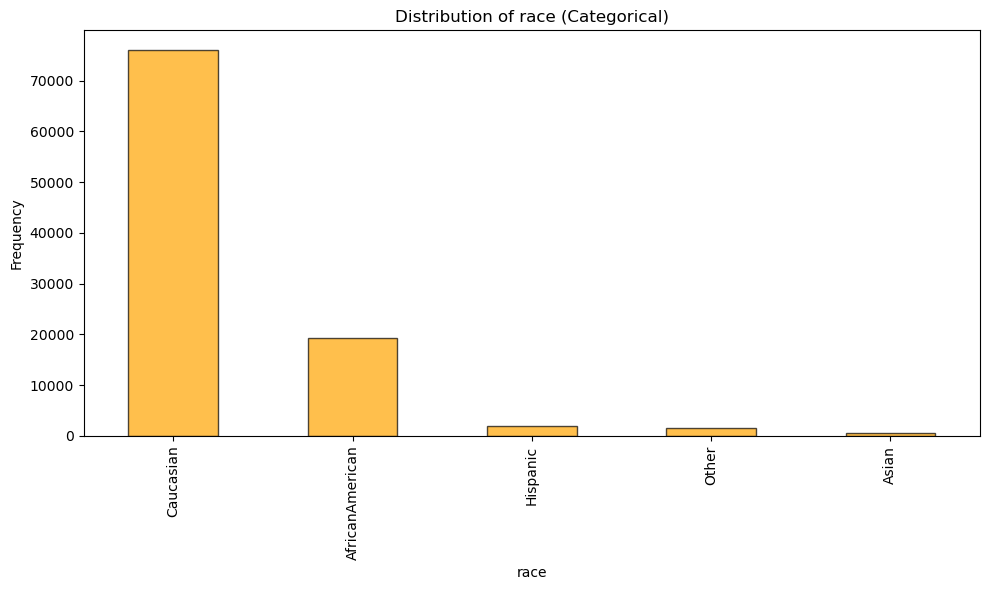

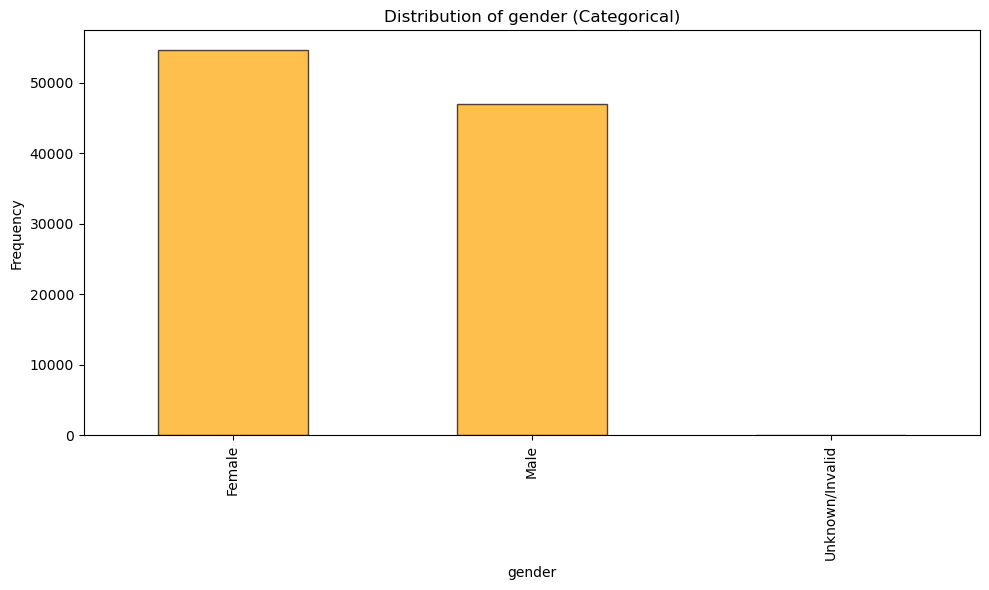

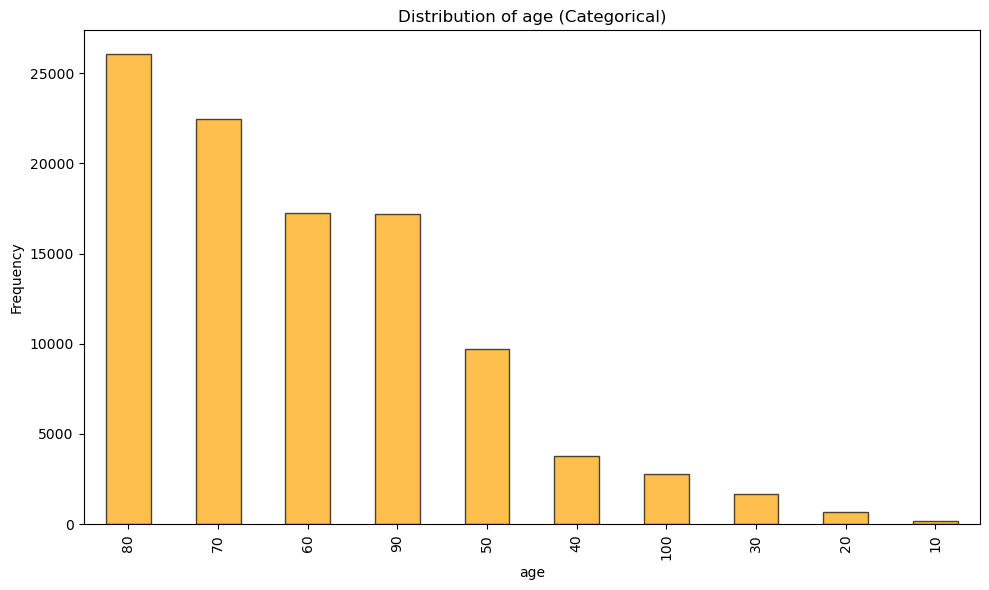

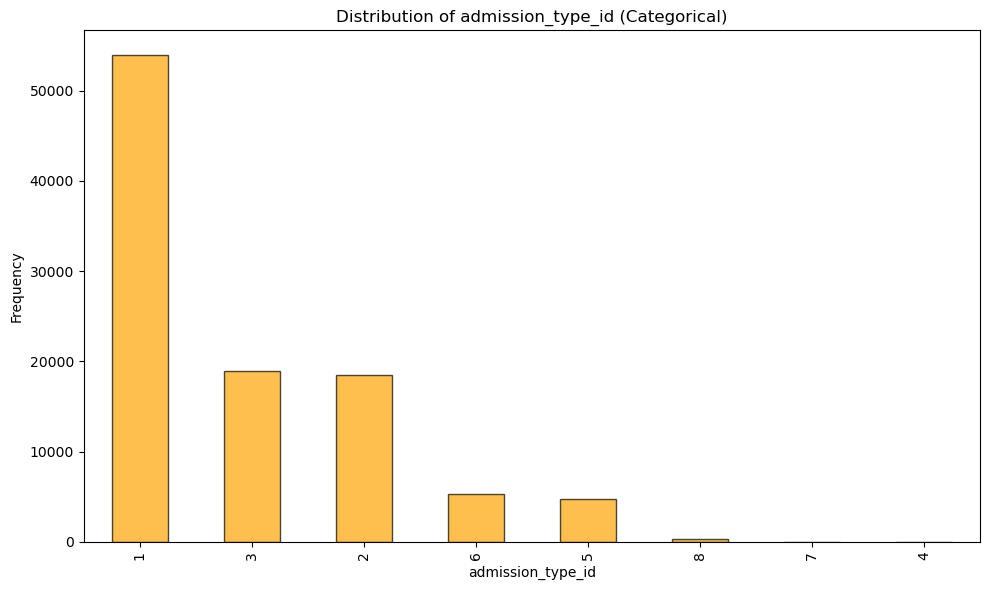

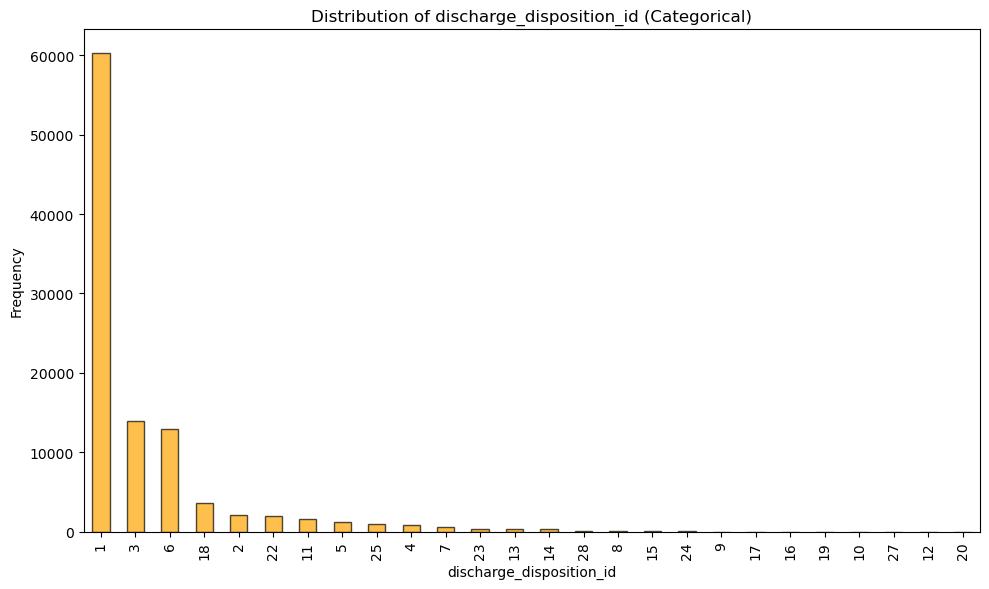

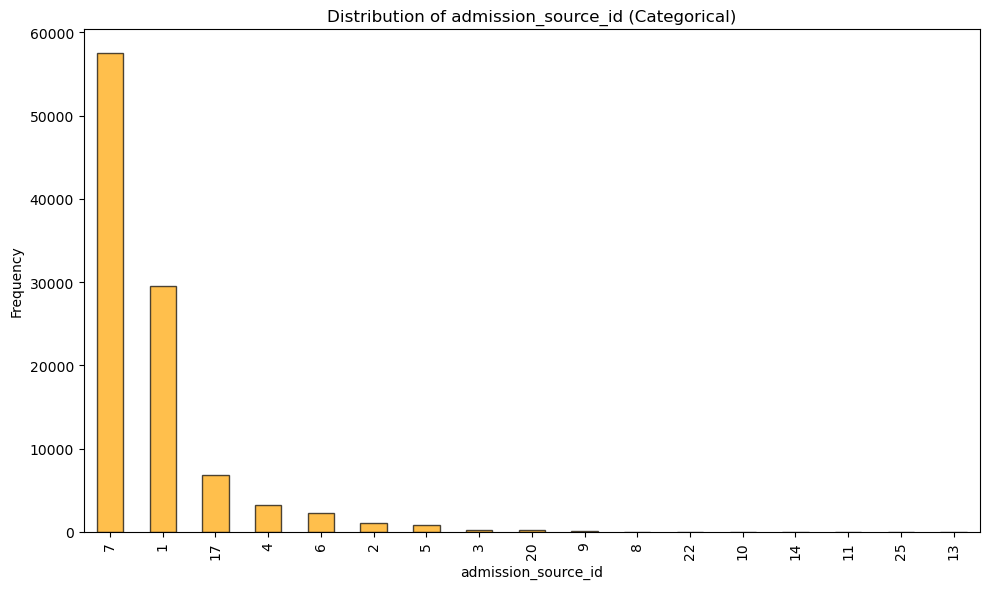

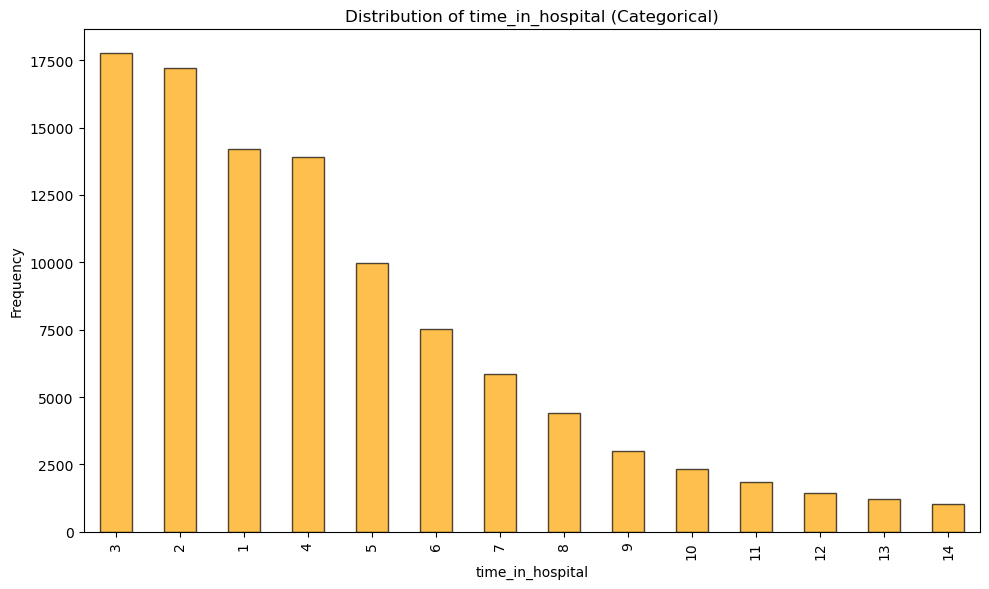

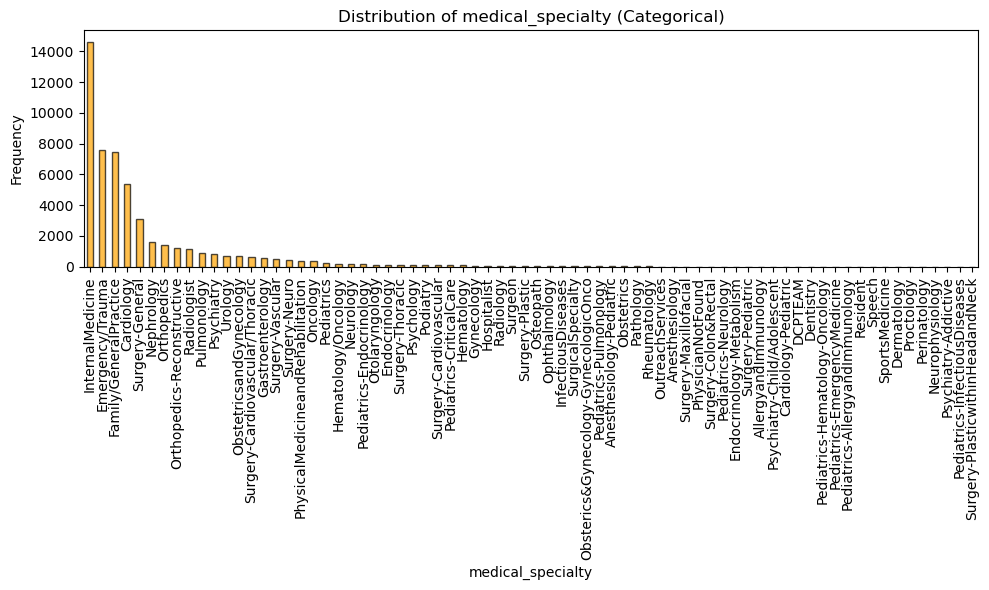

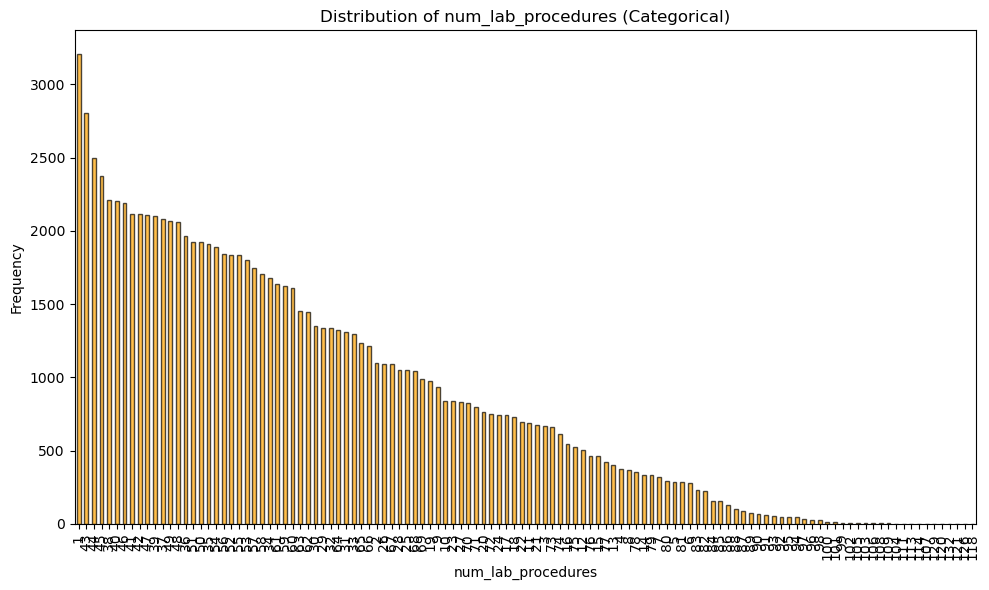

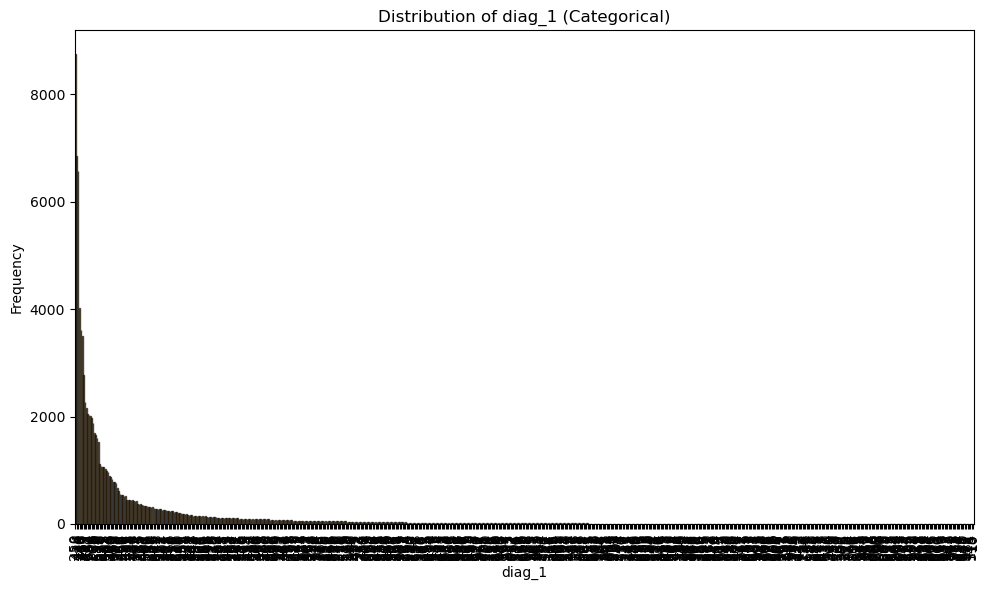

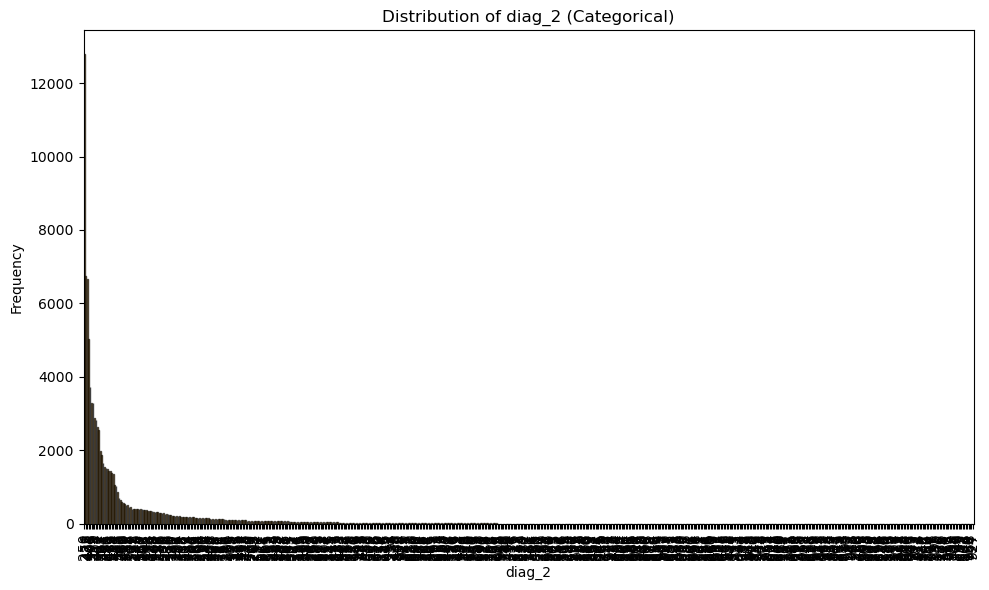

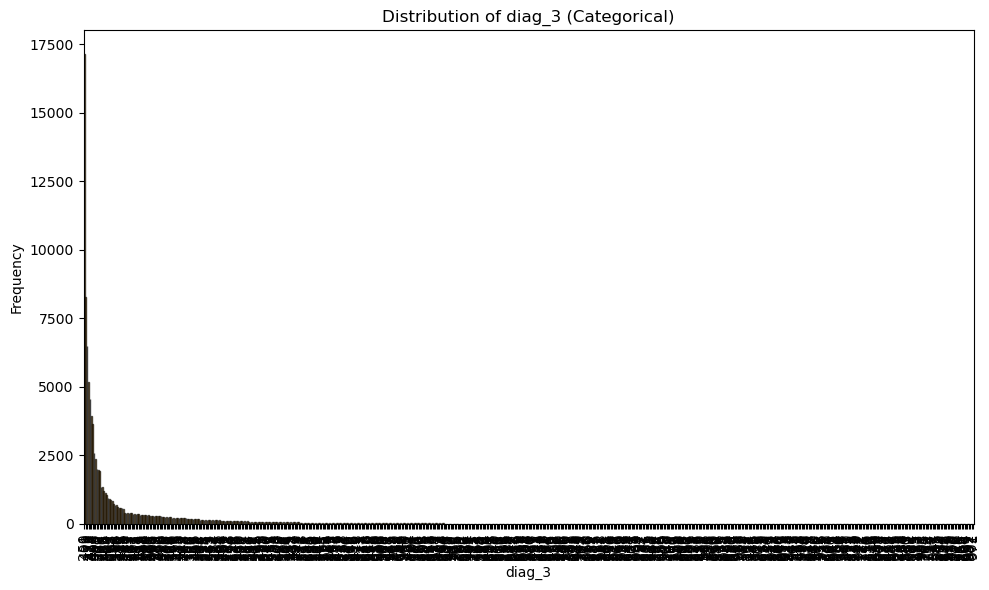

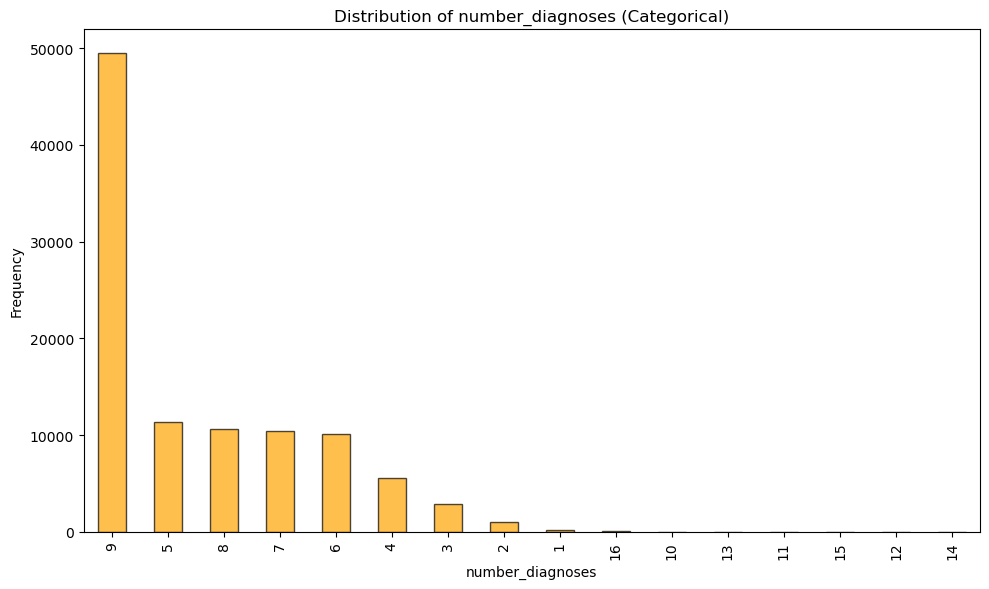

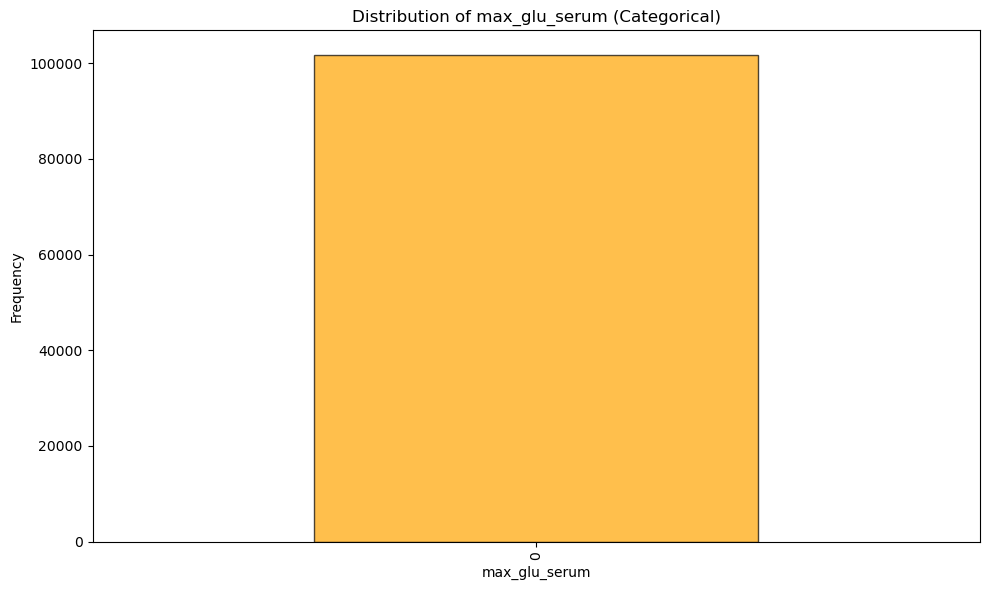

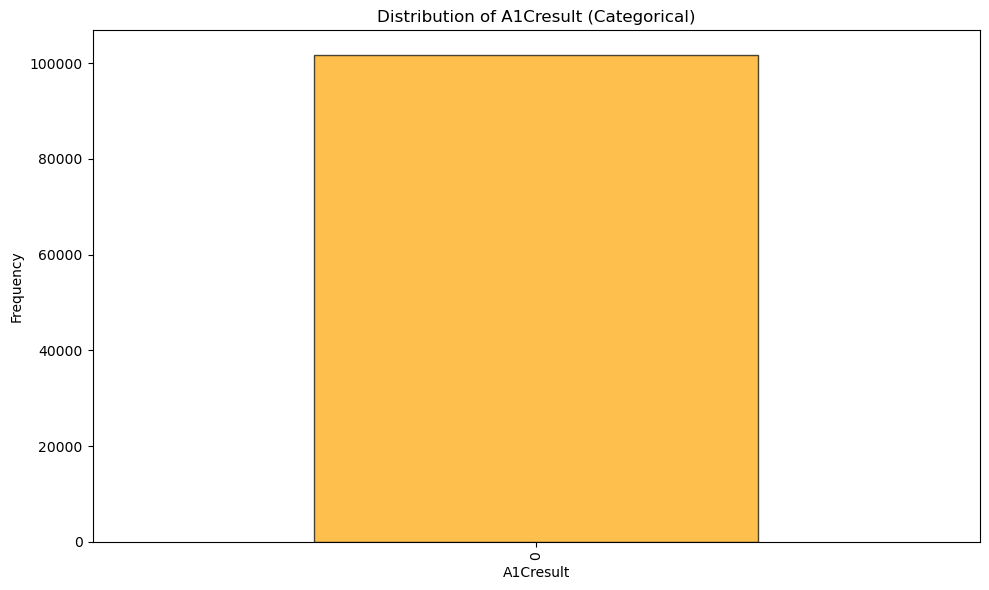

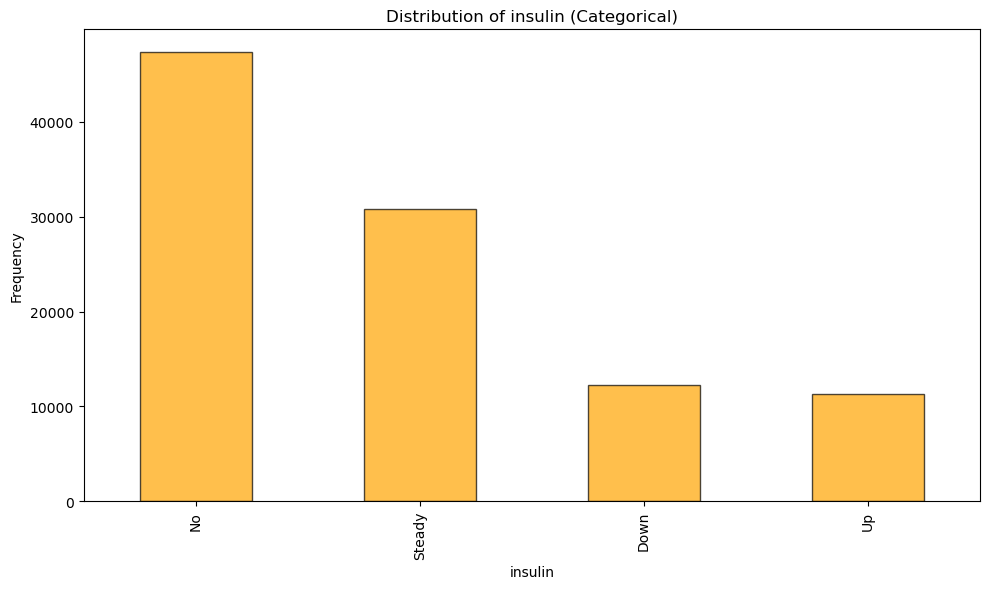

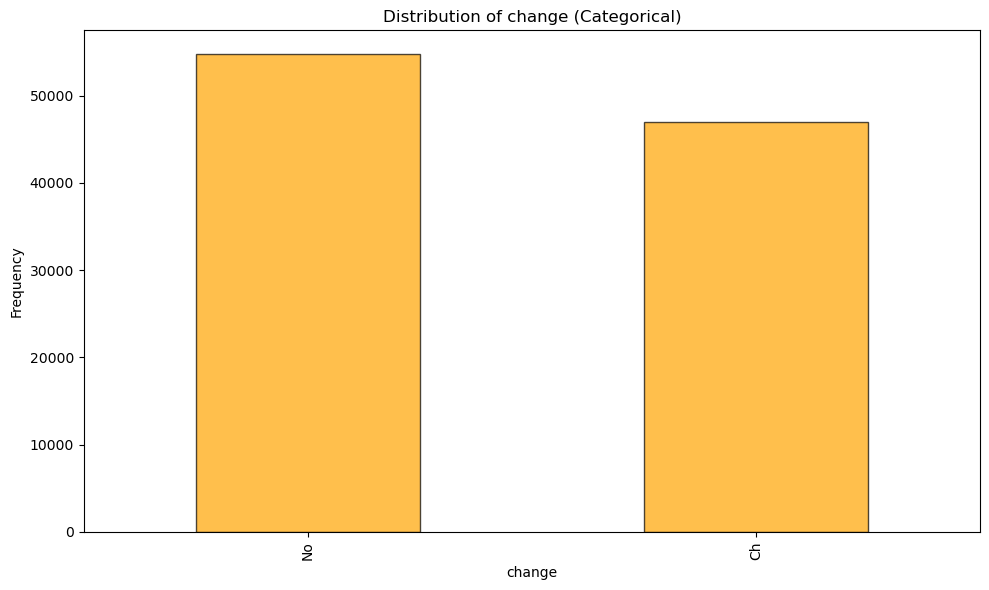

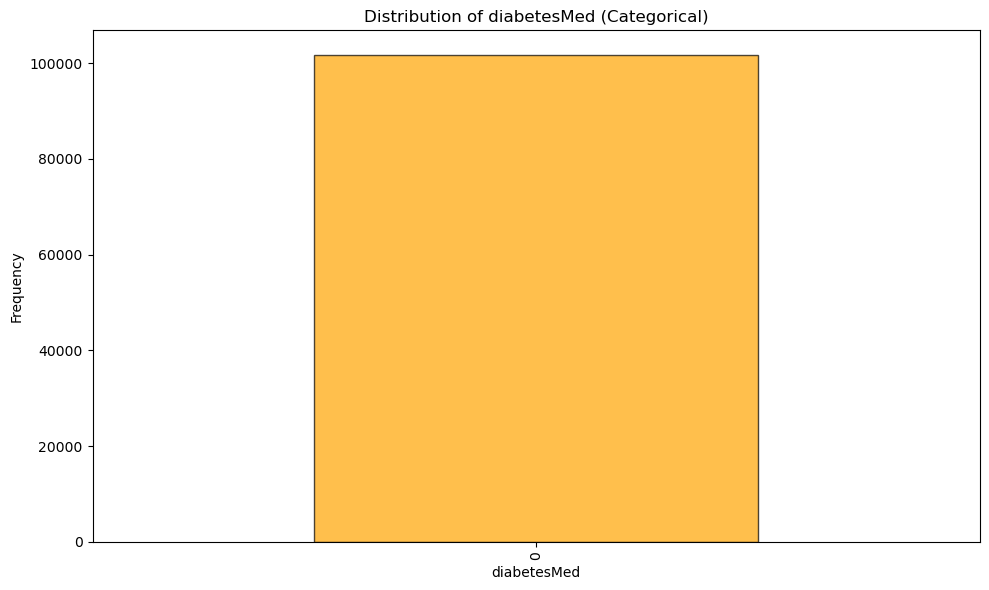

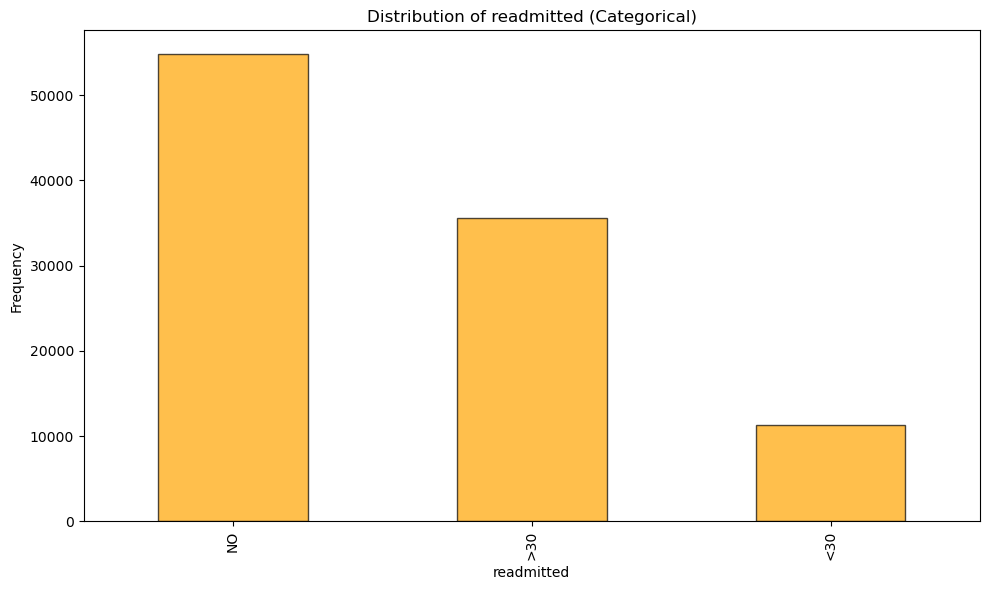

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Columns to plot (with their data types from the provided information)
columns_to_plot = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
    'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
    'insulin', 'change', 'diabetesMed', 'readmitted'
]

# Plot each column individually
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))  # Adjust the figure size for each plot
    if X[col].dtype in ['int64', 'float64']:  # Numeric data
        plt.hist(X[col], bins=10, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f'Distribution of {col} (Numeric)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:  # Categorical data
        X[col].value_counts().plot(kind='bar', color='orange', alpha=0.7, edgecolor='black')
        plt.title(f'Distribution of {col} (Categorical)')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    # Show the plot for the current column
    plt.tight_layout()
    plt.show()


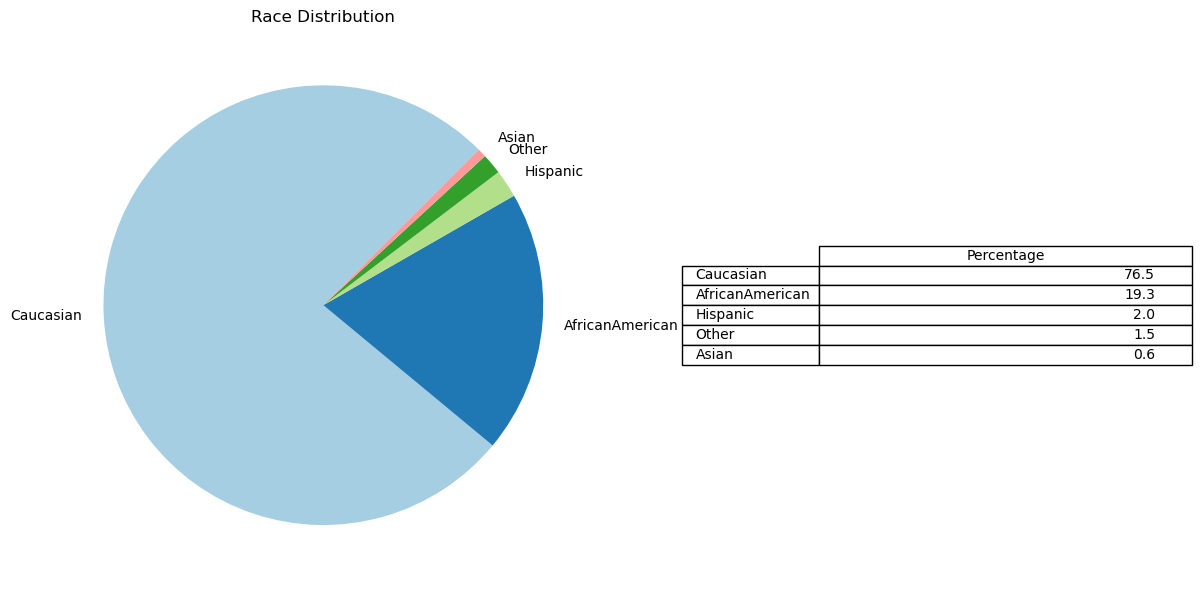

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the distribution of the 'race' column
race_counts = X['race'].value_counts()

# Calculate the percentages for each category
race_percentages = race_counts / race_counts.sum() * 100

# Create a figure with 1 row and 2 columns (for pie chart and table)
fig = plt.figure(figsize=(12, 6))

# Use gridspec to arrange the layout
gs = fig.add_gridspec(1, 2, width_ratios=[0.6, 0.4])

# Plot the pie chart in the first subplot
ax1 = fig.add_subplot(gs[0])
ax1.pie(race_counts, labels=race_counts.index, startangle=45, colors=plt.cm.Paired.colors)
ax1.set_title('Race Distribution')

# Plot the table in the second subplot
ax2 = fig.add_subplot(gs[1])

# Create a table with the percentages
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=race_percentages.round(1).values.reshape(-1, 1),
                 rowLabels=race_percentages.index,
                 colLabels=["Percentage"],
                 loc="center")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


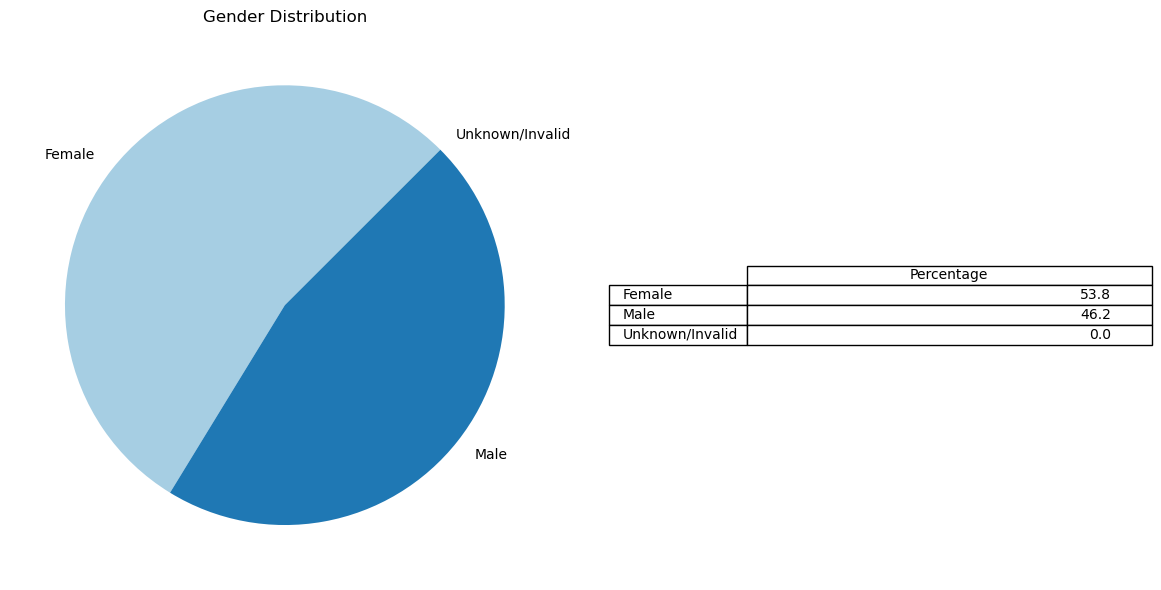

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the distribution of the 'race' column
gender_counts = X['gender'].value_counts()

# Calculate the percentages for each category
gender_percentages = gender_counts / gender_counts.sum() * 100

# Create a figure with 1 row and 2 columns (for pie chart and table)
fig = plt.figure(figsize=(12, 6))

# Use gridspec to arrange the layout
gs = fig.add_gridspec(1, 2, width_ratios=[0.6, 0.4])

# Plot the pie chart in the first subplot
ax1 = fig.add_subplot(gs[0])
ax1.pie(gender_counts, labels=gender_counts.index, startangle=45, colors=plt.cm.Paired.colors)
ax1.set_title('Gender Distribution')

# Plot the table in the second subplot
ax2 = fig.add_subplot(gs[1])

# Create a table with the percentages
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=gender_percentages.round(1).values.reshape(-1, 1),
                 rowLabels=gender_percentages.index,
                 colLabels=["Percentage"],
                 loc="center")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


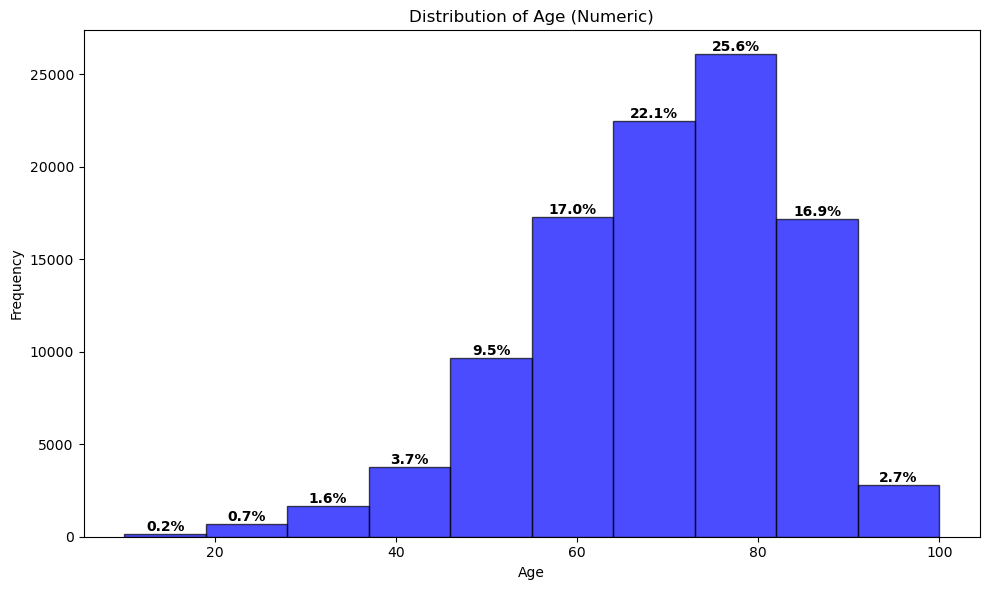

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the 'age' column histogram
plt.figure(figsize=(10, 6))

# Calculate histogram for the 'age' column
counts, bins, patches = plt.hist(X['age'], bins=10, color='blue', alpha=0.7, edgecolor='black')

# Add the percentage on top of each bar
total_count = len(X['age'])
for count, patch in zip(counts, patches):
    height = patch.get_height()
    percentage = (height / total_count) * 100
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Set the title and labels
plt.title('Distribution of Age (Numeric)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [23]:
# Correctly accessing multiple columns
X[['diag_1', 'diag_2', 'diag_3']]

diag_1  diag_2  diag_3
0          250       0       0
1          276     250     255
2          648     250       0
3            8     250     403
4          197     157     250
...        ...     ...     ...
101761     250     291     458
101762     560     276     787
101763      38     590     296
101764     996     285     998
101765     530     530     787

[101766 rows x 3 columns]

C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\3847819165.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_1.values, y=top_diag_1.index, ax=axes[0], palette="Blues_d")
C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\3847819165.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_2.values, y=top_diag_2.index, ax=axes[1], palette="Greens_d")
C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\3847819165.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_3.values, y=top_diag_3.index, ax=axes[2], palette=

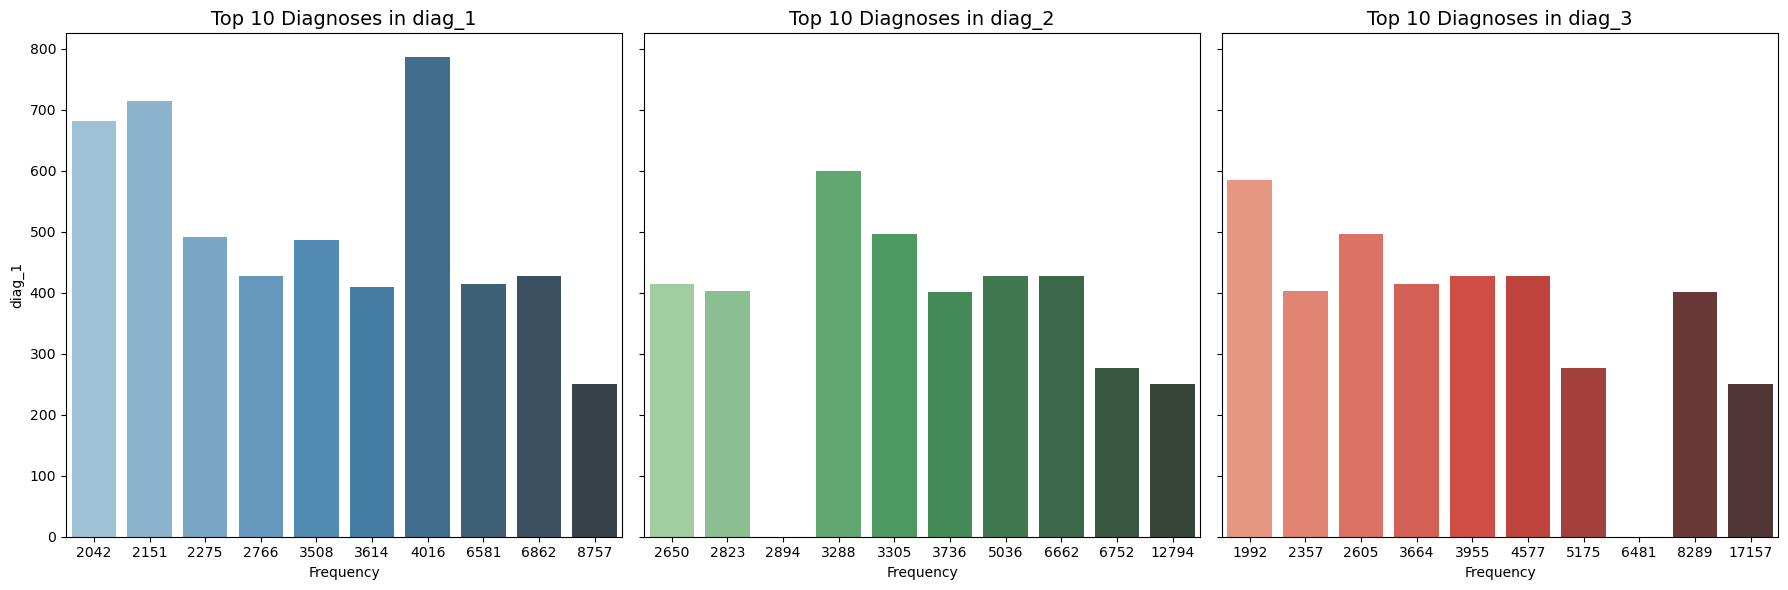

In [27]:
# Calculate the top 10 diagnoses for each column
top_diag_1 = X['diag_1'].value_counts().head(10)
top_diag_2 = X['diag_2'].value_counts().head(10)
top_diag_3 = X['diag_3'].value_counts().head(10)

# Plot side-by-side bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(x=top_diag_1.values, y=top_diag_1.index, ax=axes[0], palette="Blues_d")
axes[0].set_title("Top 10 Diagnoses in diag_1", fontsize=14)
axes[0].set_xlabel("Frequency")

sns.barplot(x=top_diag_2.values, y=top_diag_2.index, ax=axes[1], palette="Greens_d")
axes[1].set_title("Top 10 Diagnoses in diag_2", fontsize=14)
axes[1].set_xlabel("Frequency")

sns.barplot(x=top_diag_3.values, y=top_diag_3.index, ax=axes[2], palette="Reds_d")
axes[2].set_title("Top 10 Diagnoses in diag_3", fontsize=14)
axes[2].set_xlabel("Frequency")

plt.tight_layout()
plt.show()


C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\985657514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_1.values, y=top_diag_1.index, ax=axes[0], palette="Blues_d")
C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\985657514.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_2.values, y=top_diag_2.index, ax=axes[1], palette="Greens_d")
C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\985657514.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_3.values, y=top_diag_3.index, ax=axes[2], palette="R

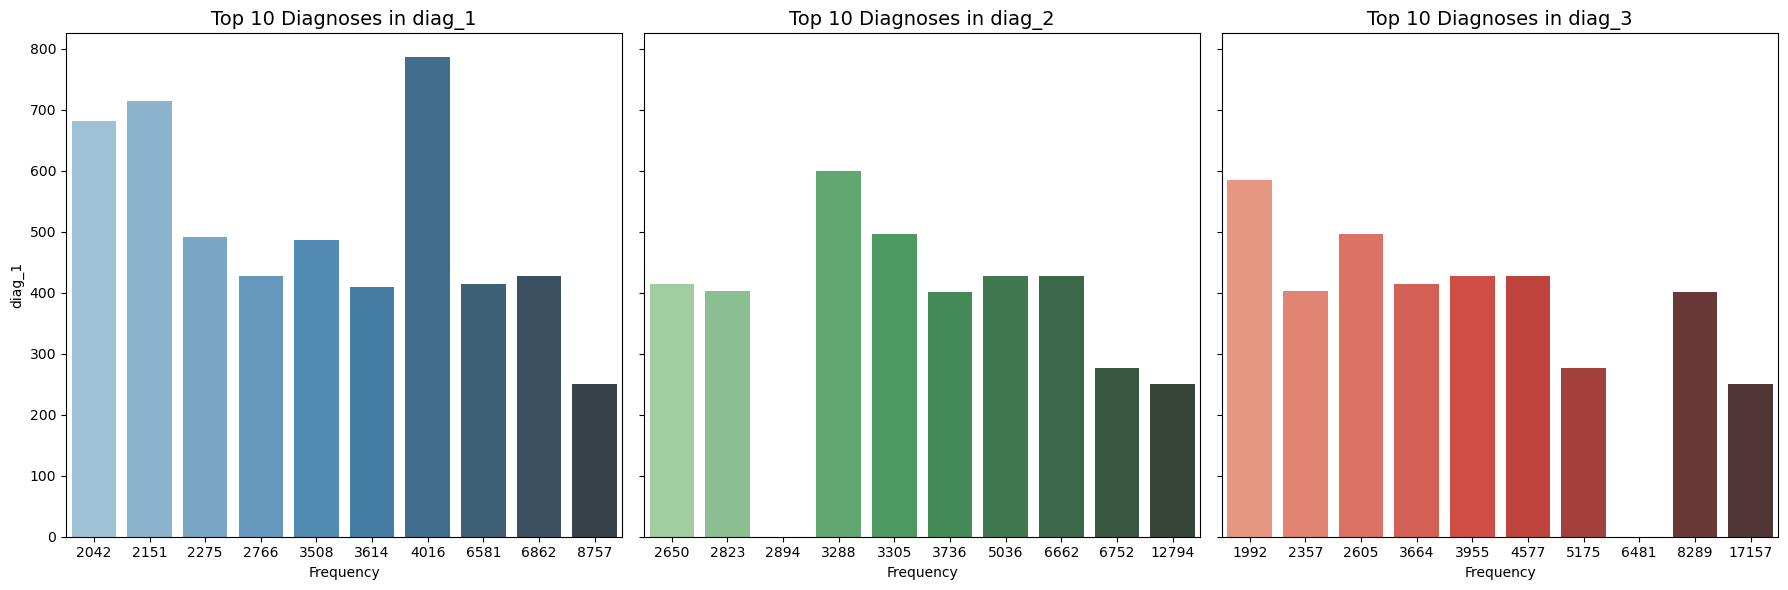

In [28]:
# Calculate the top 10 diagnoses for each column and sort them in descending order
top_diag_1 = X['diag_1'].value_counts().sort_values(ascending=False).head(10)
top_diag_2 = X['diag_2'].value_counts().sort_values(ascending=False).head(10)
top_diag_3 = X['diag_3'].value_counts().sort_values(ascending=False).head(10)

# Plot side-by-side bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for diag_1
sns.barplot(x=top_diag_1.values, y=top_diag_1.index, ax=axes[0], palette="Blues_d")
axes[0].set_title("Top 10 Diagnoses in diag_1", fontsize=14)
axes[0].set_xlabel("Frequency")

# Plot for diag_2
sns.barplot(x=top_diag_2.values, y=top_diag_2.index, ax=axes[1], palette="Greens_d")
axes[1].set_title("Top 10 Diagnoses in diag_2", fontsize=14)
axes[1].set_xlabel("Frequency")

# Plot for diag_3
sns.barplot(x=top_diag_3.values, y=top_diag_3.index, ax=axes[2], palette="Reds_d")
axes[2].set_title("Top 10 Diagnoses in diag_3", fontsize=14)
axes[2].set_xlabel("Frequency")

plt.tight_layout()
plt.show()


C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\2103016124.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_1.values, y=top_diag_1.index, ax=axes[0], palette="Blues_d",
C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\2103016124.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_2.values, y=top_diag_2.index, ax=axes[1], palette="Greens_d",
C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\2103016124.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_3.values, y=top_diag_3.index, ax=axes[2], palette

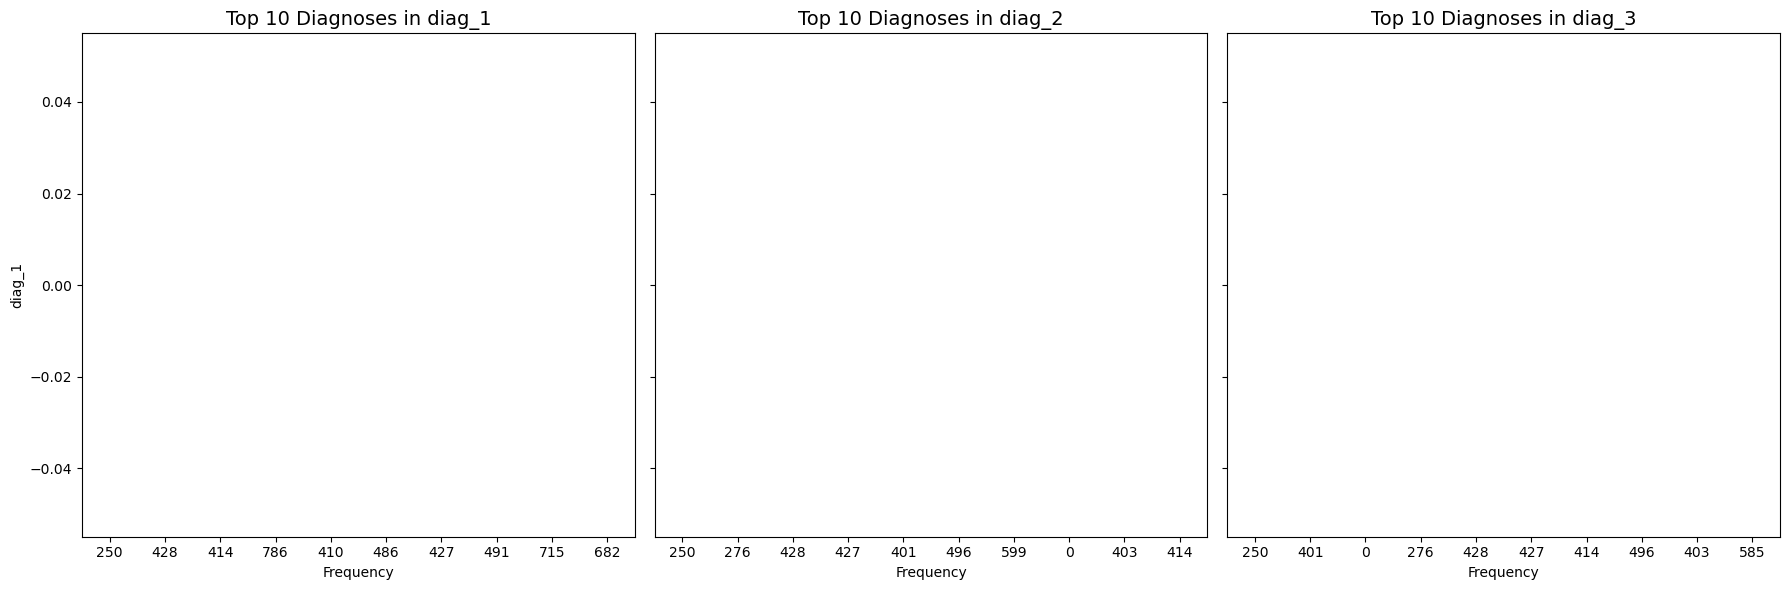

In [29]:
# Calculate the top 10 diagnoses for each column
top_diag_1 = X['diag_1'].value_counts().head(10)
top_diag_2 = X['diag_2'].value_counts().head(10)
top_diag_3 = X['diag_3'].value_counts().head(10)

# Plot side-by-side bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for diag_1 with descending order explicitly set
sns.barplot(x=top_diag_1.values, y=top_diag_1.index, ax=axes[0], palette="Blues_d",
            order=top_diag_1.index)
axes[0].set_title("Top 10 Diagnoses in diag_1", fontsize=14)
axes[0].set_xlabel("Frequency")

# Plot for diag_2 with descending order explicitly set
sns.barplot(x=top_diag_2.values, y=top_diag_2.index, ax=axes[1], palette="Greens_d",
            order=top_diag_2.index)
axes[1].set_title("Top 10 Diagnoses in diag_2", fontsize=14)
axes[1].set_xlabel("Frequency")

# Plot for diag_3 with descending order explicitly set
sns.barplot(x=top_diag_3.values, y=top_diag_3.index, ax=axes[2], palette="Reds_d",
            order=top_diag_3.index)
axes[2].set_title("Top 10 Diagnoses in diag_3", fontsize=14)
axes[2].set_xlabel("Frequency")

plt.tight_layout()
plt.show()


In [30]:
print(X['diag_1'].head(10))  # Check the first 10 rows of diag_1
print(X['diag_2'].head(10))  # Check the first 10 rows of diag_2
print(X['diag_3'].head(10))  # Check the first 10 rows of diag_3


0    250
1    276
2    648
3      8
4    197
5    414
6    414
7    428
8    398
9    434
Name: diag_1, dtype: int32
0      0
1    250
2    250
3    250
4    157
5    411
6    411
7    492
8    427
9    198
Name: diag_2, dtype: int32
0      0
1    255
2      0
3    403
4    250
5    250
6      0
7    250
8     38
9    486
Name: diag_3, dtype: int32


In [31]:
# Filter out rows where diagnoses are zero
filtered_diag_1 = X['diag_1'][X['diag_1'] != 0]
filtered_diag_2 = X['diag_2'][X['diag_2'] != 0]
filtered_diag_3 = X['diag_3'][X['diag_3'] != 0]

# Calculate the top 10 diagnoses for each column
top_diag_1 = filtered_diag_1.value_counts().head(10)
top_diag_2 = filtered_diag_2.value_counts().head(10)
top_diag_3 = filtered_diag_3.value_counts().head(10)


C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\4180069036.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_1.values, y=top_diag_1.index, ax=axes[0], palette="Blues_d")
C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\4180069036.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_2.values, y=top_diag_2.index, ax=axes[1], palette="Greens_d")
C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\4180069036.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_3.values, y=top_diag_3.index, ax=axes[2], palette=

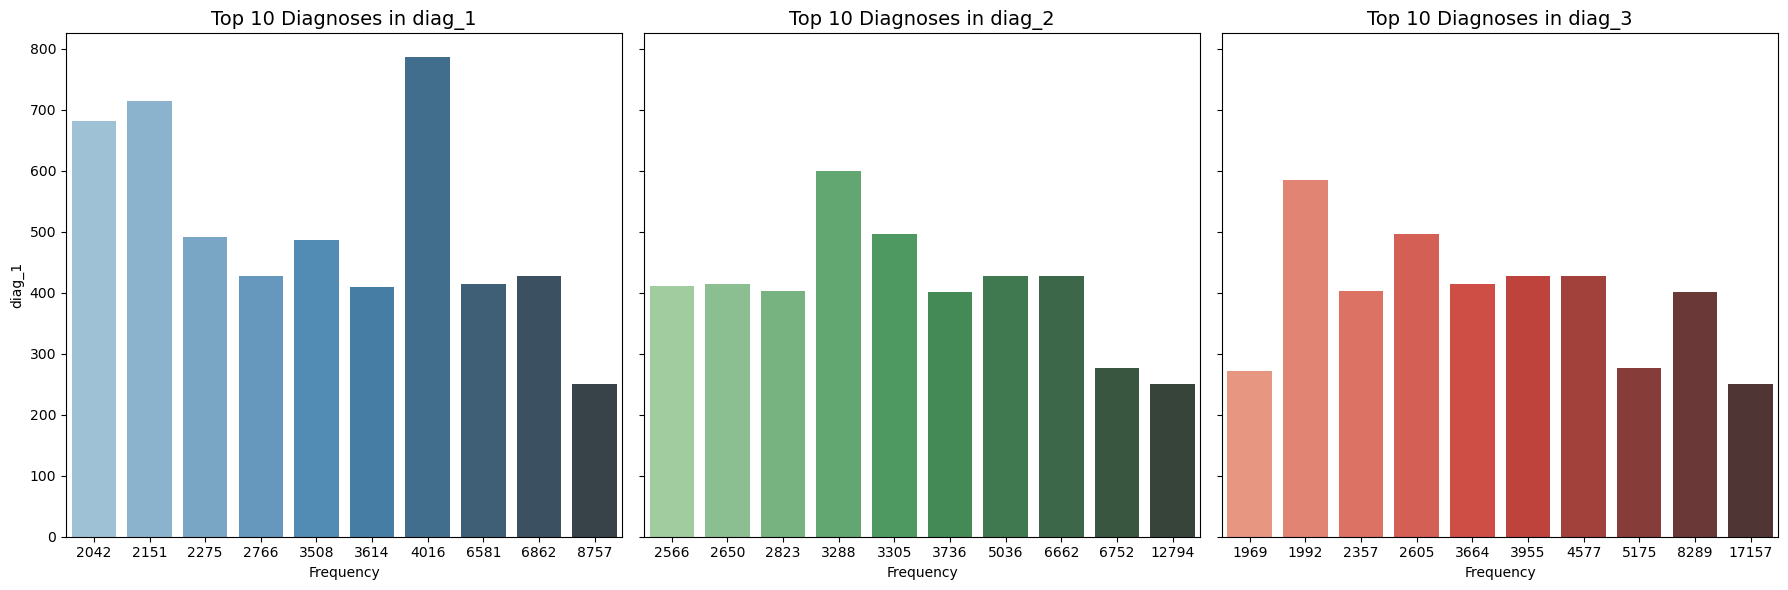

In [32]:
# Plot side-by-side bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for diag_1
sns.barplot(x=top_diag_1.values, y=top_diag_1.index, ax=axes[0], palette="Blues_d")
axes[0].set_title("Top 10 Diagnoses in diag_1", fontsize=14)
axes[0].set_xlabel("Frequency")

# Plot for diag_2
sns.barplot(x=top_diag_2.values, y=top_diag_2.index, ax=axes[1], palette="Greens_d")
axes[1].set_title("Top 10 Diagnoses in diag_2", fontsize=14)
axes[1].set_xlabel("Frequency")

# Plot for diag_3
sns.barplot(x=top_diag_3.values, y=top_diag_3.index, ax=axes[2], palette="Reds_d")
axes[2].set_title("Top 10 Diagnoses in diag_3", fontsize=14)
axes[2].set_xlabel("Frequency")

plt.tight_layout()
plt.show()


C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\3301620261.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_1.values, y=top_diag_1.index, ax=axes[0], palette="Blues_d",
C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\3301620261.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_2.values, y=top_diag_2.index, ax=axes[1], palette="Greens_d",
C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\3301620261.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag_3.values, y=top_diag_3.index, ax=axes[2], palette=

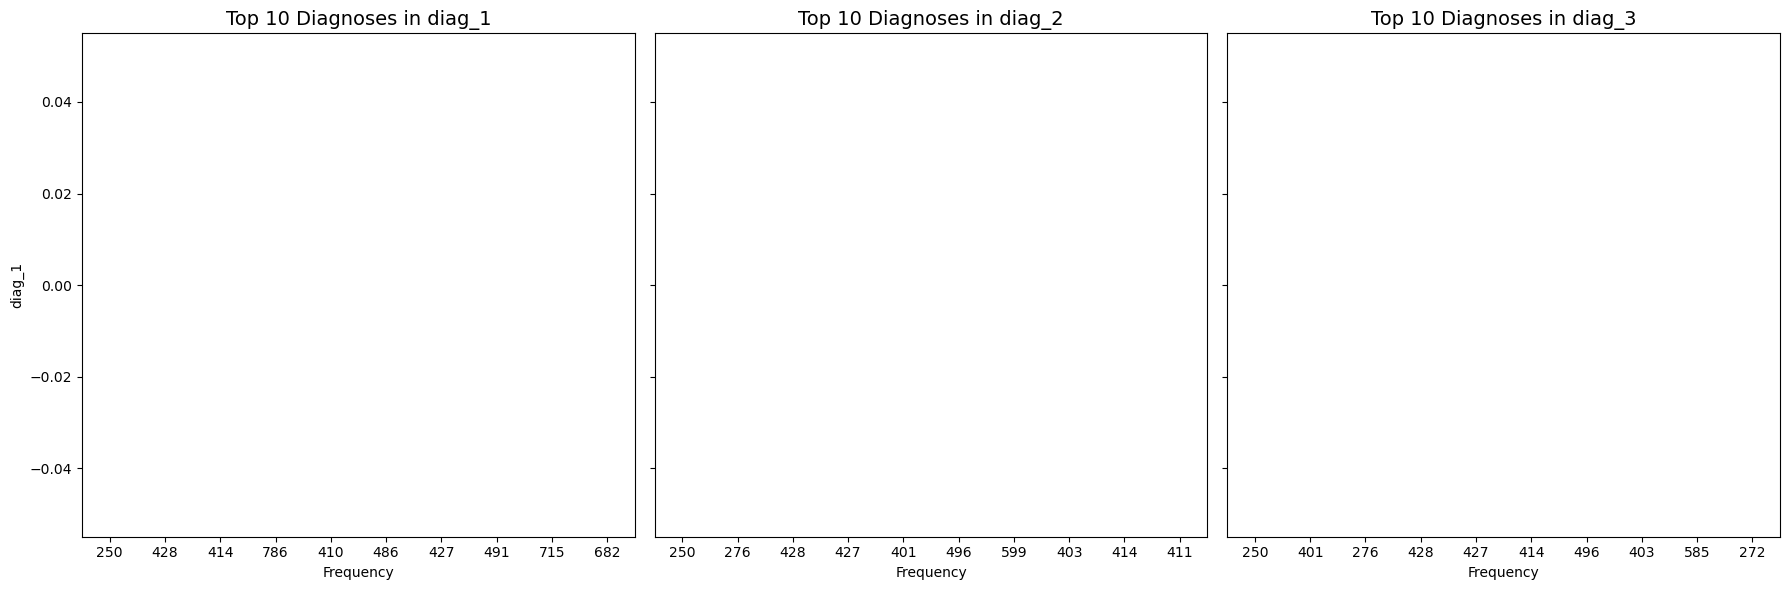

In [33]:
# Plot side-by-side bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for diag_1 in descending order
sns.barplot(x=top_diag_1.values, y=top_diag_1.index, ax=axes[0], palette="Blues_d", 
            order=top_diag_1.index)
axes[0].set_title("Top 10 Diagnoses in diag_1", fontsize=14)
axes[0].set_xlabel("Frequency")

# Plot for diag_2 in descending order
sns.barplot(x=top_diag_2.values, y=top_diag_2.index, ax=axes[1], palette="Greens_d", 
            order=top_diag_2.index)
axes[1].set_title("Top 10 Diagnoses in diag_2", fontsize=14)
axes[1].set_xlabel("Frequency")

# Plot for diag_3 in descending order
sns.barplot(x=top_diag_3.values, y=top_diag_3.index, ax=axes[2], palette="Reds_d", 
            order=top_diag_3.index)
axes[2].set_title("Top 10 Diagnoses in diag_3", fontsize=14)
axes[2].set_xlabel("Frequency")

plt.tight_layout()
plt.show()


In [34]:
# Print the top 10 values for each diagnosis column, sorted in descending order
print("Top 10 Diagnoses in diag_1:")
print(X['diag_1'].value_counts().sort_values(ascending=False).head(10))

print("\nTop 10 Diagnoses in diag_2:")
print(X['diag_2'].value_counts().sort_values(ascending=False).head(10))

print("\nTop 10 Diagnoses in diag_3:")
print(X['diag_3'].value_counts().sort_values(ascending=False).head(10))


Top 10 Diagnoses in diag_1:
diag_1
250    8757
428    6862
414    6581
786    4016
410    3614
486    3508
427    2766
491    2275
715    2151
682    2042
Name: count, dtype: int64

Top 10 Diagnoses in diag_2:
diag_2
250    12794
276     6752
428     6662
427     5036
401     3736
496     3305
599     3288
0       2894
403     2823
414     2650
Name: count, dtype: int64

Top 10 Diagnoses in diag_3:
diag_3
250    17157
401     8289
0       6481
276     5175
428     4577
427     3955
414     3664
496     2605
403     2357
585     1992
Name: count, dtype: int64


Top 10 Diagnoses in diag_1:
diag_1
250    8757
428    6862
414    6581
786    4016
410    3614
486    3508
427    2766
491    2275
715    2151
682    2042
Name: count, dtype: int64

Top 10 Diagnoses in diag_2:
diag_2
250    12794
276     6752
428     6662
427     5036
401     3736
496     3305
599     3288
0       2894
403     2823
414     2650
Name: count, dtype: int64

Top 10 Diagnoses in diag_3:
diag_3
250    17157
401     8289
0       6481
276     5175
428     4577
427     3955
414     3664
496     2605
403     2357
585     1992
Name: count, dtype: int64


C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\1639178937.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_diag_1.values, x=top_diag_1.index, ax=axes[0], palette="Blues_d")
C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\1639178937.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_diag_2.values, x=top_diag_2.index, ax=axes[1], palette="Greens_d")
C:\Users\sweet\AppData\Local\Temp\ipykernel_10288\1639178937.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_diag_3.values, x=top_diag_3.index, ax=axes[2], palette

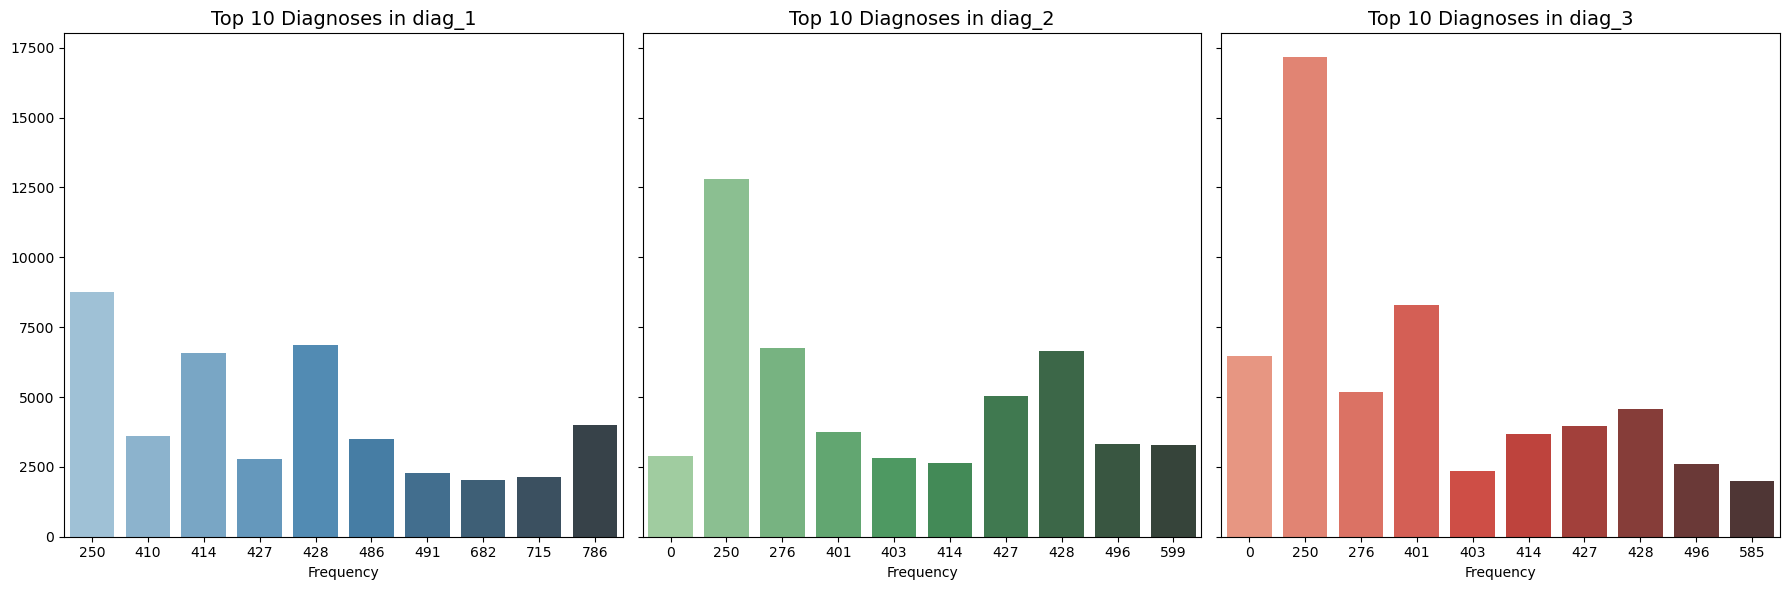

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the top 10 diagnoses for each column, sorted in descending order
top_diag_1 = X['diag_1'].value_counts().sort_values(ascending=False).head(10)
top_diag_2 = X['diag_2'].value_counts().sort_values(ascending=False).head(10)
top_diag_3 = X['diag_3'].value_counts().sort_values(ascending=False).head(10)

# Print top 10 for each diagnosis column
print("Top 10 Diagnoses in diag_1:")
print(top_diag_1)

print("\nTop 10 Diagnoses in diag_2:")
print(top_diag_2)

print("\nTop 10 Diagnoses in diag_3:")
print(top_diag_3)

# Plot side-by-side bar plots for the top 10 diagnoses
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for diag_1
sns.barplot(y=top_diag_1.values, x=top_diag_1.index, ax=axes[0], palette="Blues_d")
axes[0].set_title("Top 10 Diagnoses in diag_1", fontsize=14)
axes[0].set_xlabel("Frequency")

# Plot for diag_2
sns.barplot(y=top_diag_2.values, x=top_diag_2.index, ax=axes[1], palette="Greens_d")
axes[1].set_title("Top 10 Diagnoses in diag_2", fontsize=14)
axes[1].set_xlabel("Frequency")

# Plot for diag_3
sns.barplot(y=top_diag_3.values, x=top_diag_3.index, ax=axes[2], palette="Reds_d")
axes[2].set_title("Top 10 Diagnoses in diag_3", fontsize=14)
axes[2].set_xlabel("Frequency")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [42]:
X['max_glu_serum'].

array([0])

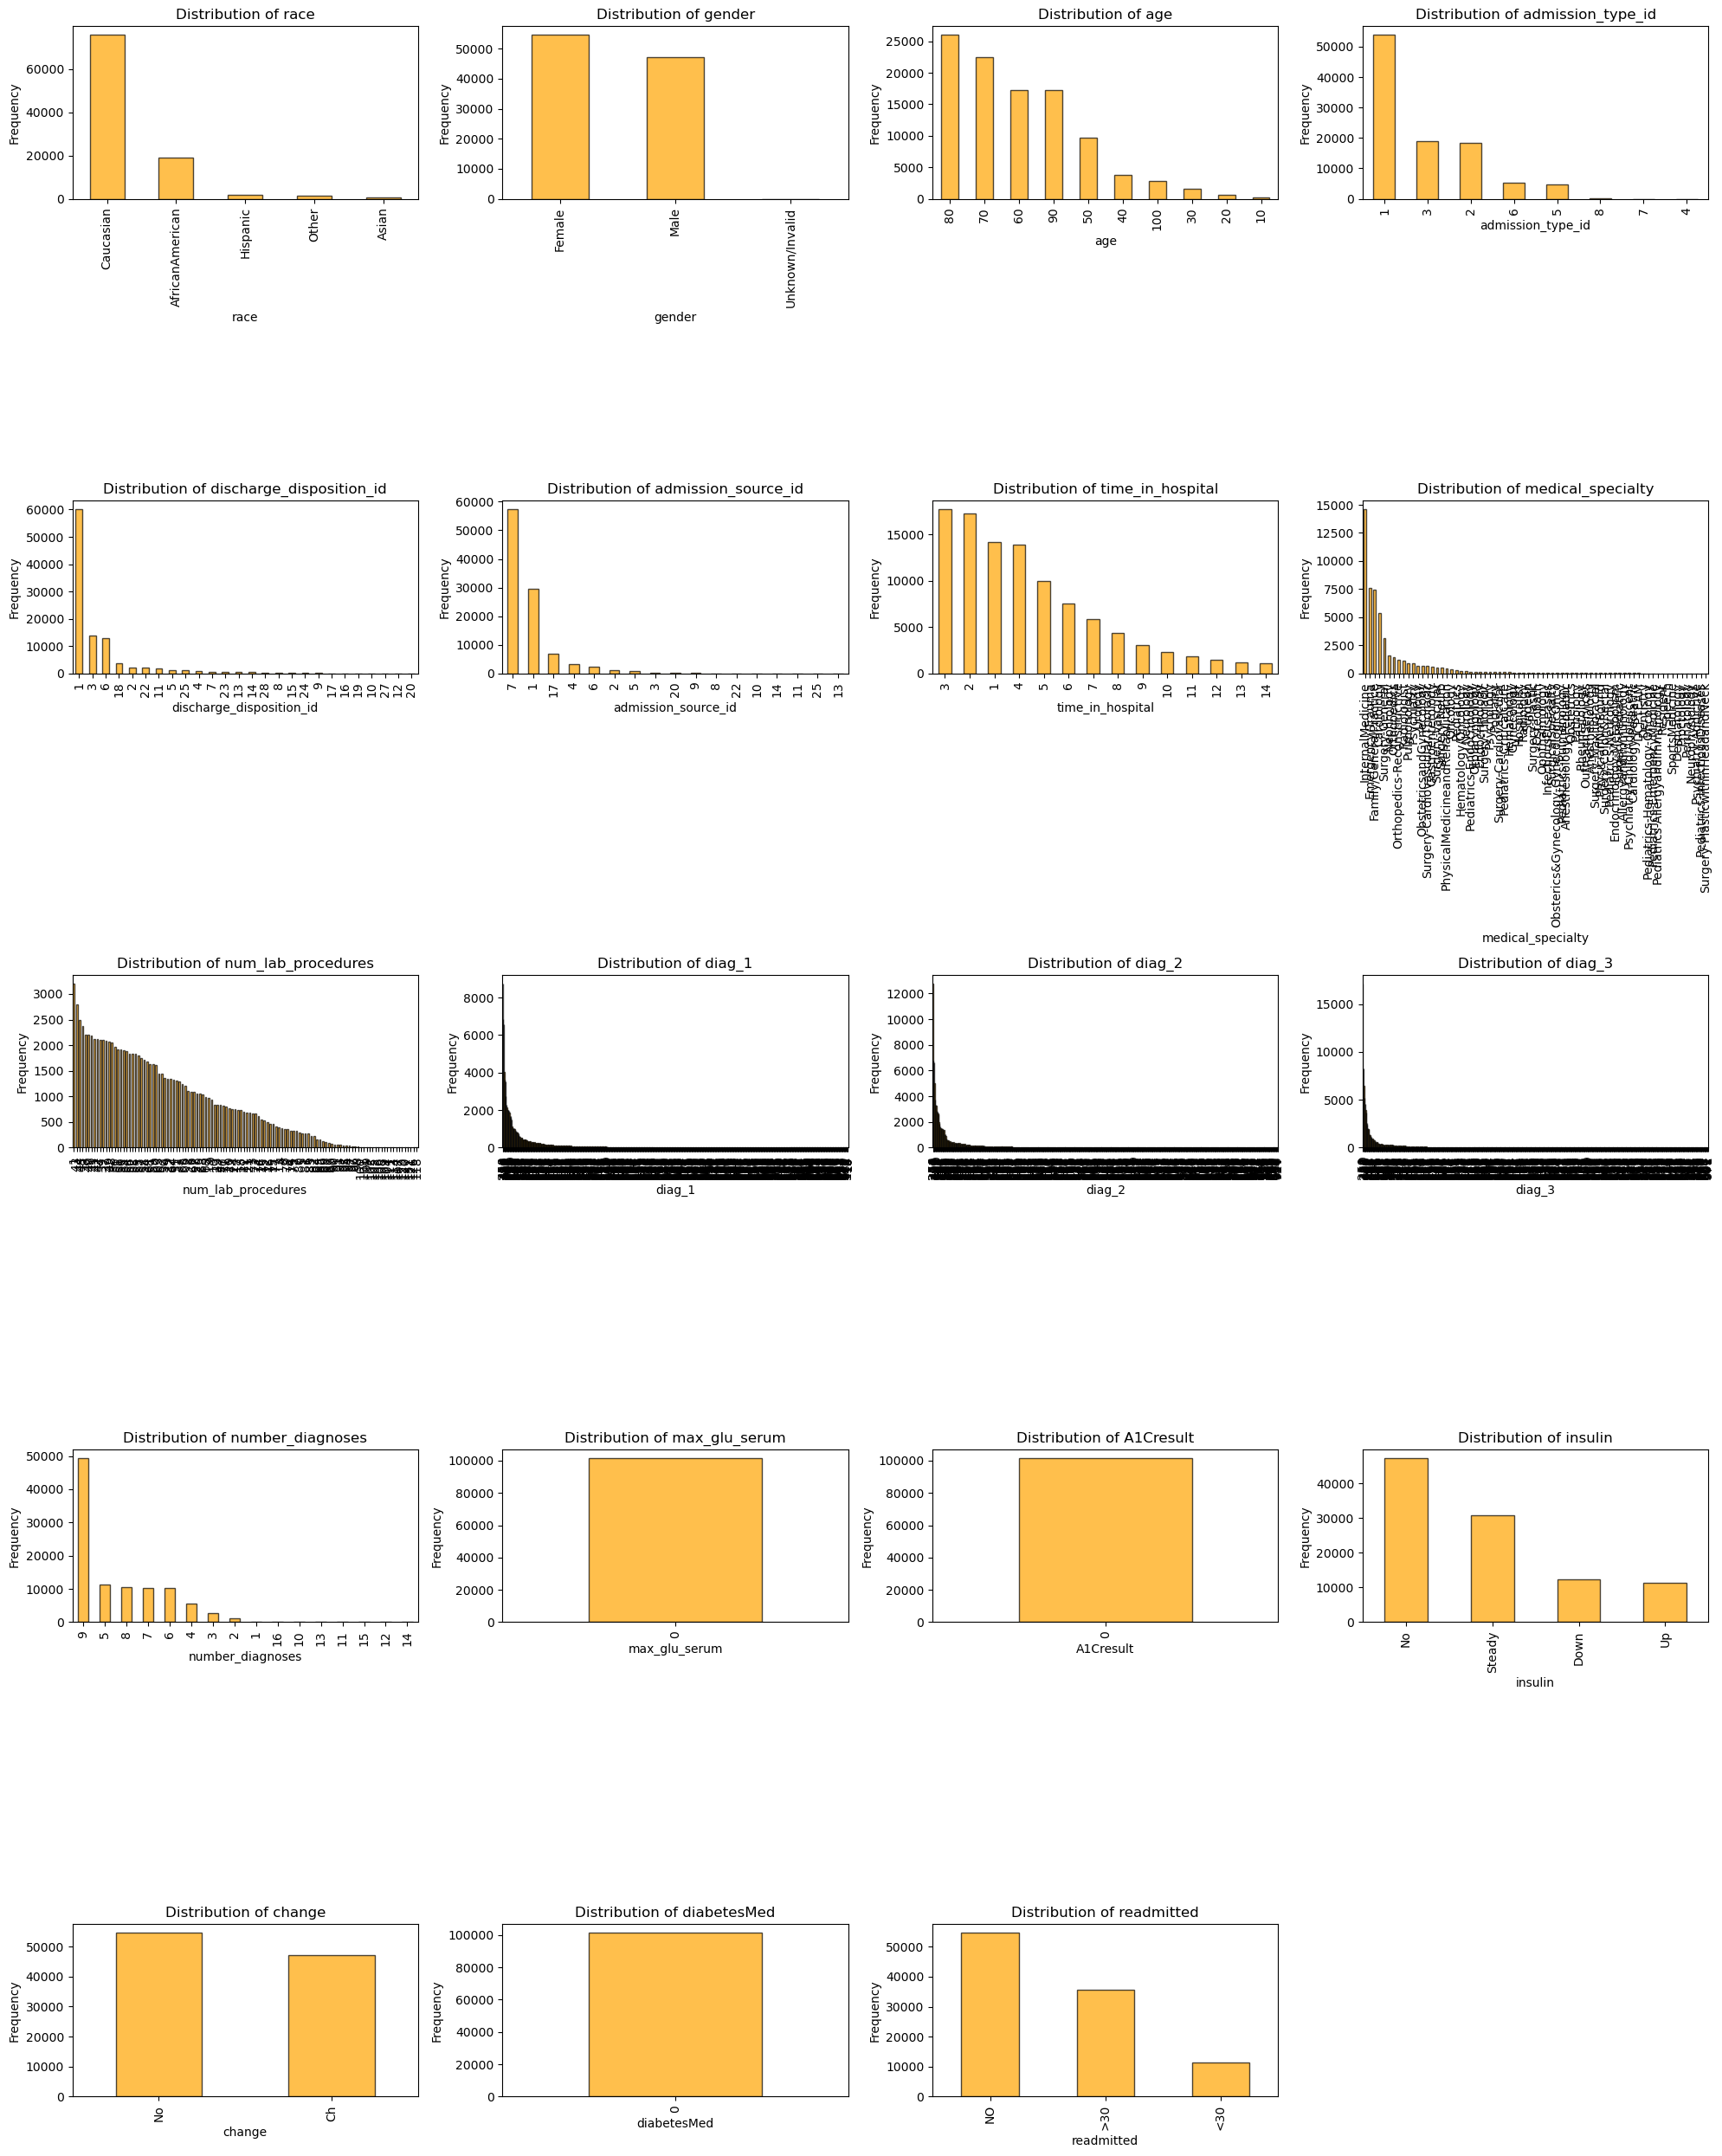

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Columns to plot (with their data types from the provided information)
columns_to_plot = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
    'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
    'insulin', 'change', 'diabetesMed', 'readmitted'
]

# Determine grid size
num_cols = 4
num_rows = int(np.ceil(len(columns_to_plot) / num_cols))

# Set up the grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    if X[col].dtype in ['int64', 'float64']:  # Numeric data
        ax.hist(X[col], bins=10, color='blue', alpha=0.7, edgecolor='black')  # Blue color for numeric histograms
    else:  # Categorical data
        X[col].value_counts().plot(kind='bar', ax=ax, color='orange', alpha=0.7, edgecolor='black')
    
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [1]:
import numpy as np

import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.impute import SimpleImputer
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

IMPORT THE FILE

In [2]:
import pandas as pd

# Reading the dataset
df = pd.read_csv('C:/Users/athir/Downloads/archive (6)/diabetic_data.csv')

# Drop columns with high percentage of missing values or irrelevant features
drop_columns = ['max_glu_serum', 'A1Cresult', 'weight', 'citoglipton', 'examide',
                'payer_code', 'medical_specialty', 'encounter_id']
df.drop(columns=drop_columns, inplace=True)

# Handle missing values and replace '?' with None
for col in df.columns:
    df[col].replace('?', None, inplace=True)

# Drop rows with unknown gender type (rows with '?' in gender column)
df.drop(index=[30506, 75551, 82573], inplace=True)

# Replace any occurrences of '?' in the 'race' column with 'Other'
df['race'] = df['race'].apply(lambda x: 'Other' if x == '?' else x)

# Removing rows with invalid diagnoses ('diag_1', 'diag_2', 'diag_3')
for diag_column in ['diag_1', 'diag_2', 'diag_3']:
    df[diag_column] = pd.to_numeric(df[diag_column], errors='coerce')

# Replace 'age' ranges with corresponding numerical values (already defined function)
def replace_age_ranges(feature):
    age_ranges = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
    values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    for i, age_range in enumerate(age_ranges):
        feature = feature.replace(age_range, values[i])

    return feature

df['age'] = replace_age_ranges(df['age'])

# Replace 'readmitted' values with numeric values (for model compatibility)
df['readmitted'].replace({'>30': 2, '<30': 1, 'NO': 0}, inplace=True)

# Handle 'insulin' column conversion
df['insulin'].replace({'Down': -1, 'No': 0, 'Steady': 1, 'Up': 2}, inplace=True)

# Handle 'change' column conversion
df['change'].replace({'Ch': 1, 'No': 0}, inplace=True)

# Handle 'diabetesMed' column conversion
df['diabetesMed'].replace({'No': 0, 'Yes': 1}, inplace=True)


# Drop rows where any diagnostic column is None (NaN) after conversion
df.dropna(subset=['diag_1', 'diag_2', 'diag_3'], inplace=True)


In [3]:
df

patient_nbr             race  gender  age  admission_type_id  \
1          55629189        Caucasian  Female    2                  1   
3          82442376        Caucasian    Male    4                  1   
4          42519267        Caucasian    Male    5                  1   
5          82637451        Caucasian    Male    6                  2   
7         114882984        Caucasian    Male    8                  1   
...             ...              ...     ...  ...                ...   
101761    100162476  AfricanAmerican    Male    8                  1   
101762     74694222  AfricanAmerican  Female    9                  1   
101763     41088789        Caucasian    Male    8                  1   
101764     31693671        Caucasian  Female    9                  2   
101765    175429310        Caucasian    Male    8                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                              1                    7                 3   
3                              1                    7                 2   
4                              1                    7                 1   
5                              1                    2                 3   
7                              1                    7                 5   
...                          ...                  ...               ...   
101761                         3                    7                 3   
101762                         4                    5                 5   
101763                         1                    7                 1   
101764                         3                    7                10   
101765                         1                    7                 6   

        num_lab_procedures  num_procedures  ...  tolazamide  insulin  \
1                       59               0  ...          No        2   
3                       44               1  ...          No        2   
4                       51               0  ...          No        1   
5                       31               6  ...          No        1   
7                       73               0  ...          No        0   
...                    ...             ...  ...         ...      ...   
101761                  51               0  ...          No       -1   
101762                  33               3  ...          No        1   
101763                  53               0  ...          No       -1   
101764                  45               2  ...          No        2   
101765                  13               3  ...          No        0   

        glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
1                        No                   No                        No   
3                        No                   No                        No   
4                        No                   No                        No   
5                        No                   No                        No   
7                        No                   No                        No   
...                     ...                  ...                       ...   
101761                   No                   No                        No   
101762                   No                   No                        No   
101763                   No                   No                        No   
101764                   No                   No                        No   
101765                   No                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
1                            No                      No       1           1   
3                            No                      No       1           1   
4                            No                      No       1           1   
5                            No                      No       0           1   
7                            No              

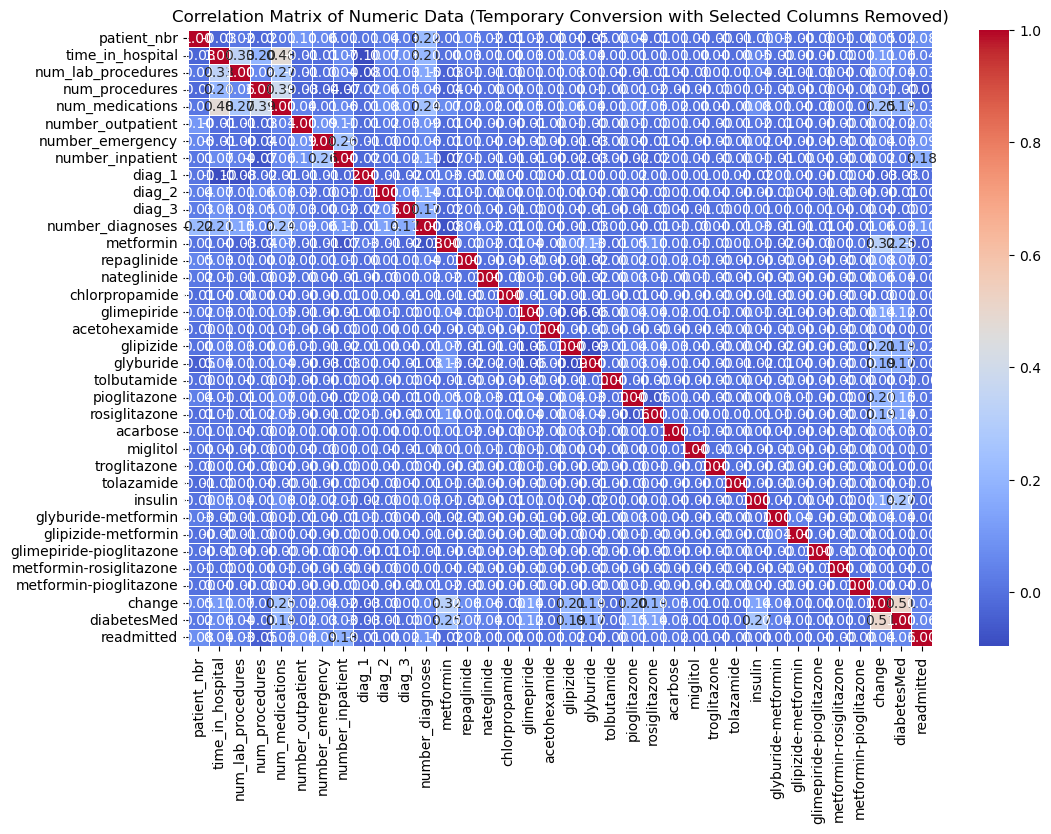

Columns with Best Correlation with 'readmitted':
readmitted                  1.000000
number_inpatient            0.178647
number_diagnoses            0.100608
number_emergency            0.088807
number_outpatient           0.082318
patient_nbr                 0.076313
diabetesMed                 0.058354
change                      0.043083
time_in_hospital            0.037233
num_lab_procedures          0.034094
num_medications             0.033646
repaglinide                 0.021063
diag_3                      0.019673
glipizide                   0.018051
acarbose                    0.015655
pioglitazone                0.014811
rosiglitazone               0.011459
miglitol                    0.005342
acetohexamide               0.004232
glimepiride-pioglitazone    0.004232
glimepiride                 0.003926
chlorpropamide              0.003727
nateglinide                 0.003595
troglitazone                0.003207
glipizide-metformin         0.003133
glyburide                 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Function to convert categorical columns to numeric temporarily
def convert_to_numeric_temp(df):
    df_temp = df.copy()  # Create a temporary copy of the dataframe
    for column in df_temp.columns:
        if df_temp[column].dtype == 'object':  # If the column is categorical
            unique_vals = df_temp[column].unique()
            mapping = {val: idx+1 for idx, val in enumerate(unique_vals)}  # Map to integers
            df_temp[column] = df_temp[column].map(mapping)  # Apply the mapping
    return df_temp

# Convert categorical columns to numeric temporarily
df_temp = convert_to_numeric_temp(df)

# Drop the specified columns before calculating the correlation matrix
columns_to_drop = ['race', 'gender', 'age', 'weight', 'admission_type_id',
                   'discharge_disposition_id', 'admission_source_id']
df_temp.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

# Calculate the correlation matrix
corr_matrix = df_temp.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Data (Temporary Conversion with Selected Columns Removed)')
plt.show()

# Get the correlation of all columns with 'readmitted'
readmitted_corr = corr_matrix['readmitted'].sort_values(ascending=False)

# Display the table of correlations with 'readmitted'
print("Columns with Best Correlation with 'readmitted':")
print(readmitted_corr)

# Optional: To display the table in a more readable format (as a DataFrame)
readmitted_corr_df = pd.DataFrame(readmitted_corr).reset_index()
readmitted_corr_df.columns = ['Column', 'Correlation with Readmitted']
print(readmitted_corr_df)


In [5]:
df

patient_nbr             race  gender  age  admission_type_id  \
1          55629189        Caucasian  Female    2                  1   
3          82442376        Caucasian    Male    4                  1   
4          42519267        Caucasian    Male    5                  1   
5          82637451        Caucasian    Male    6                  2   
7         114882984        Caucasian    Male    8                  1   
...             ...              ...     ...  ...                ...   
101761    100162476  AfricanAmerican    Male    8                  1   
101762     74694222  AfricanAmerican  Female    9                  1   
101763     41088789        Caucasian    Male    8                  1   
101764     31693671        Caucasian  Female    9                  2   
101765    175429310        Caucasian    Male    8                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                              1                    7                 3   
3                              1                    7                 2   
4                              1                    7                 1   
5                              1                    2                 3   
7                              1                    7                 5   
...                          ...                  ...               ...   
101761                         3                    7                 3   
101762                         4                    5                 5   
101763                         1                    7                 1   
101764                         3                    7                10   
101765                         1                    7                 6   

        num_lab_procedures  num_procedures  ...  tolazamide  insulin  \
1                       59               0  ...          No        2   
3                       44               1  ...          No        2   
4                       51               0  ...          No        1   
5                       31               6  ...          No        1   
7                       73               0  ...          No        0   
...                    ...             ...  ...         ...      ...   
101761                  51               0  ...          No       -1   
101762                  33               3  ...          No        1   
101763                  53               0  ...          No       -1   
101764                  45               2  ...          No        2   
101765                  13               3  ...          No        0   

        glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
1                        No                   No                        No   
3                        No                   No                        No   
4                        No                   No                        No   
5                        No                   No                        No   
7                        No                   No                        No   
...                     ...                  ...                       ...   
101761                   No                   No                        No   
101762                   No                   No                        No   
101763                   No                   No                        No   
101764                   No                   No                        No   
101765                   No                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
1                            No                      No       1           1   
3                            No                      No       1           1   
4                            No                      No       1           1   
5                            No                      No       0           1   
7                            No              

In [6]:
# Iterating through each medicine column and converting 'No' to 0 and other values to 1.
medicines = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
             'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
             'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
             'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

for col in medicines:
    df[col] = df[col].apply(lambda x: 0 if x == 'No' else 1)

# Convert 'gender' column: 'Female' to 0, 'Male' to 1
df['gender'] = df['gender'].apply(lambda x: 0 if x == 'Female' else 1)

# Convert 'change' column: 'No' to 0, 'Ch' to 1
df['change'] = df['change'].apply(lambda x: 0 if x == 'No' else 1)

# Convert 'diabetesMed' column: 'No' to 0, 'Yes' to 1
df['diabetesMed'] = df['diabetesMed'].apply(lambda x: 0 if x == 'No' else 1)



# Remove duplicate entries based on 'patient_nbr'
df.drop_duplicates(subset='patient_nbr', keep='first', inplace=True)



# Use LabelEncoder for the 'race' feature
encoder = LabelEncoder()
df['race'] = encoder.fit_transform(df['race'])


In [7]:
df

patient_nbr  race  gender  age  admission_type_id  \
1          55629189     2       0    2                  1   
3          82442376     2       1    4                  1   
4          42519267     2       1    5                  1   
5          82637451     2       1    6                  2   
7         114882984     2       1    8                  1   
...             ...   ...     ...  ...                ...   
101754    183087545     2       0    8                  1   
101755    188574944     4       0    5                  1   
101756    140199494     4       0    7                  1   
101758    120975314     2       0    9                  1   
101765    175429310     2       1    8                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                              1                    7                 3   
3                              1                    7                 2   
4                              1                    7                 1   
5                              1                    2                 3   
7                              1                    7                 5   
...                          ...                  ...               ...   
101754                         1                    7                 9   
101755                         1                    7                14   
101756                         1                    7                 2   
101758                         1                    7                 5   
101765                         1                    7                 6   

        num_lab_procedures  num_procedures  ...  tolazamide  insulin  \
1                       59               0  ...           0        1   
3                       44               1  ...           0        1   
4                       51               0  ...           0        1   
5                       31               6  ...           0        1   
7                       73               0  ...           0        1   
...                    ...             ...  ...         ...      ...   
101754                  50               2  ...           0        1   
101755                  73               6  ...           0        1   
101756                  46               6  ...           0        1   
101758                  76               1  ...           0        1   
101765                  13               3  ...           0        1   

        glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
1                         0                    0                         0   
3                         0                    0                         0   
4                         0                    0                         0   
5                         0                    0                         0   
7                         0                    0                         0   
...                     ...                  ...                       ...   
101754                    0                    0                         0   
101755                    0                    0                         0   
101756                    0                    0                         0   
101758                    0                    0                         0   
101765                    0                    0                         0   

        metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  \
1                             0                       0       1            1   
3                             0                       0       1            1   
4                             0                       0       1            1   
5                             0                       0       1            1   
7                             0                       0       1            1   
...                         ...                     ...     ...          ...   
101754      

In [8]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate Features (X) and Target (y)
X = df.drop(columns=['readmitted'])  # Use all columns except the target
y = df['readmitted']

# Split Data (75% Train, 25% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Handle Imbalance Using SMOTEN
from imblearn.over_sampling import SMOTEN
sm = SMOTEN(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Gradient Boosting Classifier
model = GradientBoostingClassifier(
    n_estimators=150,        # Slightly increased trees for better accuracy
    learning_rate=0.05,      # Slower learning for better generalization
    max_depth=6,             # Increased depth to handle more features
    random_state=42
)

# Train Model
model.fit(X_train_res, y_train_res)

# Predict on Test Set
y_pred = model.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



#Here’s a brief explanation of the model:

#1. **Data Preprocessing**: The dataset is split into training (75%) and testing (25%) sets. **SMOTEN** (SMOTE for Nominal) is used to balance the minority class in the training data.

#2. **Model Choice**: The model uses **Gradient Boosting Classifier**, which is an ensemble learning method that combines weak learners (decision trees) to create a strong model.

#3. **Hyperparameters**: The model is configured with **150 estimators**, **learning rate of 0.05** (slower learning for better generalization), and a **max depth of 6** for the individual trees to handle more complexity.

#4. **Model Training**: The model is trained on the resampled dataset, and predictions are made on the test set.

#5. **Evaluation**: The model's performance is evaluated using **accuracy** and a detailed **classification report** (precision, recall, F1-score).

Model Accuracy: 0.58

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.83      0.72      9802
           1       0.13      0.13      0.13      1473
           2       0.50      0.22      0.30      5160

    accuracy                           0.58     16435
   macro avg       0.42      0.39      0.39     16435
weighted avg       0.55      0.58      0.54     16435



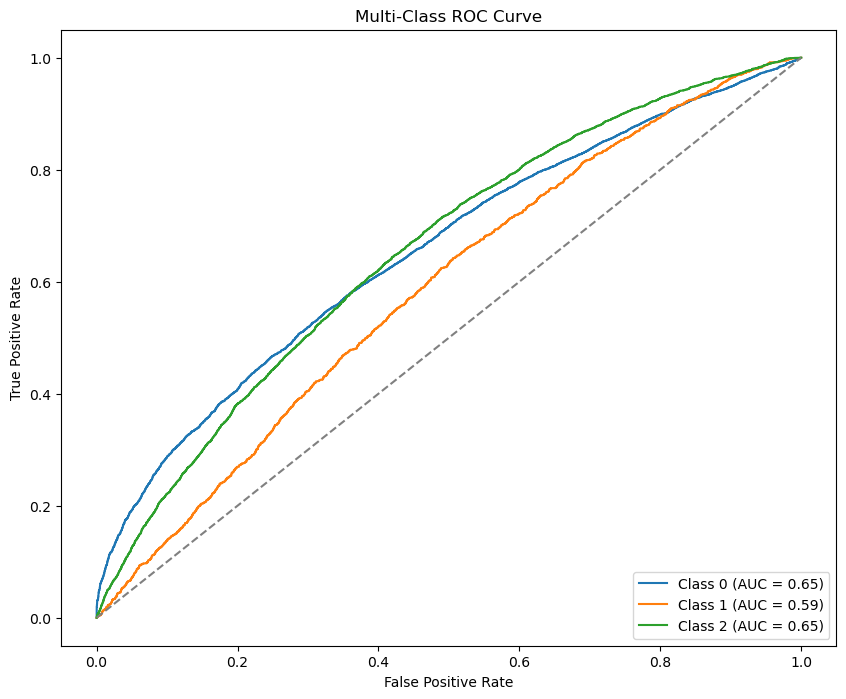

In [10]:
# ROC-AUC Score

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.show()


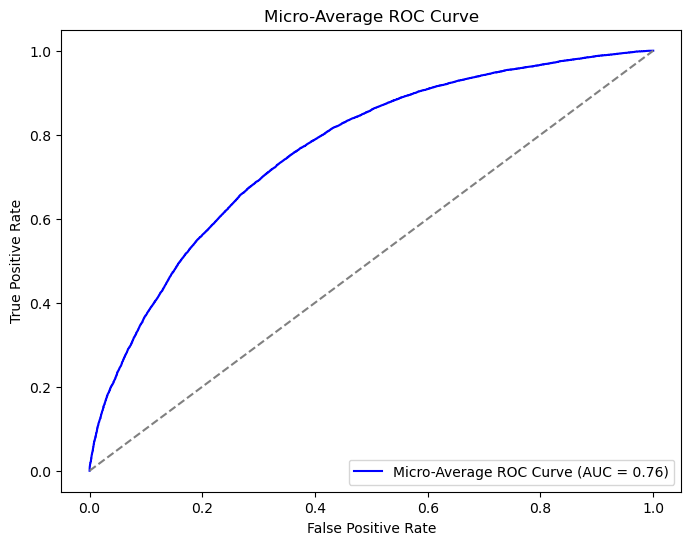

In [11]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), model.predict_proba(X_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f"Micro-Average ROC Curve (AUC = {roc_auc['micro']:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-Average ROC Curve")
plt.legend(loc="lower right")
plt.show()


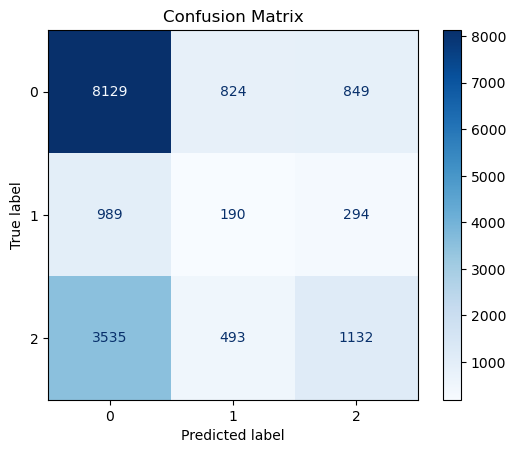

In [12]:
# confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


C:\Users\athir\AppData\Local\Temp\ipykernel_18760\1320986893.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


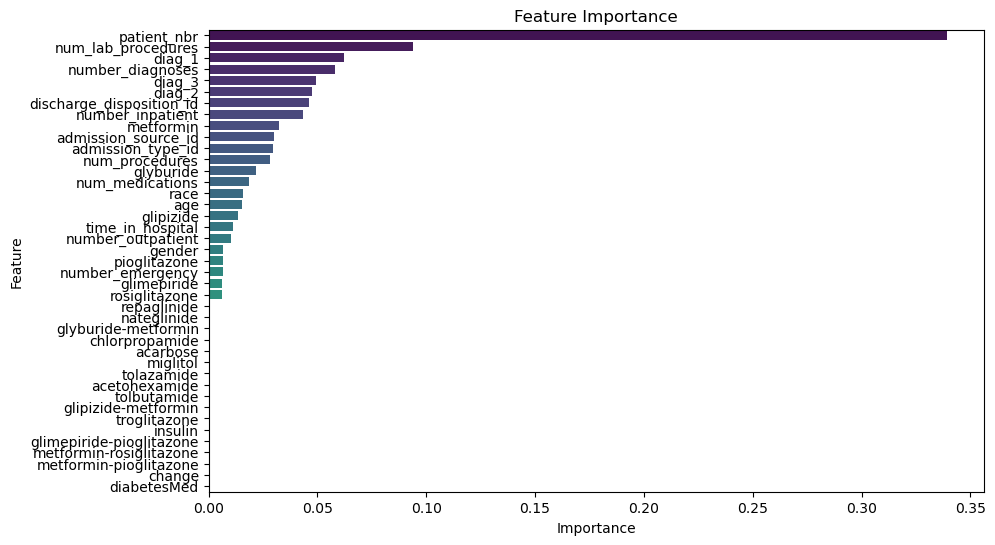

In [13]:
# Feature Importance
#Analyze which features contributed most to the predictions.

import pandas as pd
import matplotlib.pyplot as plt

# Feature importance for Gradient Boosting
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [14]:
#  Address Overfitting or Underfitting 
#  Training and Testing Accuracy

train_accuracy = accuracy_score(y_train_res, model.predict(X_train_res))
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.75
Testing Accuracy: 0.58


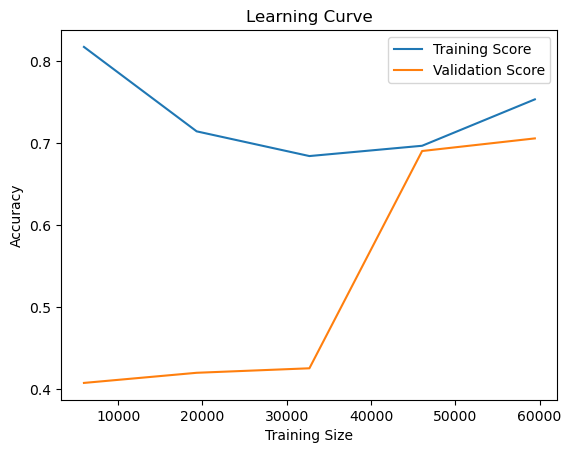

In [15]:
# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_res, y_train_res, cv=5, scoring='accuracy', n_jobs=-1
)

train_means = train_scores.mean(axis=1)
test_means = test_scores.mean(axis=1)

plt.plot(train_sizes, train_means, label="Training Score")
plt.plot(train_sizes, test_means, label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()


In [19]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import tensorflow as tf

# Separate Features (X) and Target (y)
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Split Data (75% Train, 25% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Handle Imbalance Using SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Scale Features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Convert Labels to Categorical
y_train_res = tf.keras.utils.to_categorical(y_train_res, num_classes=3)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Build the Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Softmax for multiclass classification
])

# Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Correct loss for multiclass classification
    metrics=['accuracy']
)

# Train the Model
history = model.fit(
    X_train_res, y_train_res,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    verbose=1
)

# Predict on Test Data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate Performance
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred_classes):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))



#Here’s a brief explanation of the model:

#1. **Data Preprocessing**: The dataset is split into training (75%) and testing (25%) sets. **SMOTE** is used to address class imbalance, followed by feature scaling using **StandardScaler**.

#2. **Model Architecture**: The model consists of three **Dense** layers (128, 64, and 32 units) with **ReLU** activations. **Dropout** layers (0.3) are applied for regularization. The output layer uses **Softmax** for multiclass classification (3 classes).

#3. **Compilation**: The model uses **Adam optimizer**, **categorical cross-entropy** loss (appropriate for multiclass), and tracks **accuracy** during training.

#4. **Training**: The model is trained for **50 epochs** with a **batch size of 128**, using a **20% validation split**.

#5. **Evaluation**: **Accuracy** and **classification report** (precision, recall, F1-score) are printed for the model's performance on the test set.


Epoch 1/50
552/552 [==============================] - 5s 6ms/step - loss: 0.9728 - accuracy: 0.5407 - val_loss: 1.6451 - val_accuracy: 0.1681
Epoch 2/50
552/552 [==============================] - 3s 5ms/step - loss: 0.9275 - accuracy: 0.5708 - val_loss: 1.8070 - val_accuracy: 0.1654
Epoch 3/50
552/552 [==============================] - 3s 5ms/step - loss: 0.9105 - accuracy: 0.5791 - val_loss: 1.7588 - val_accuracy: 0.1687
Epoch 4/50
552/552 [==============================] - 3s 5ms/step - loss: 0.9001 - accuracy: 0.5856 - val_loss: 1.8756 - val_accuracy: 0.1780
Epoch 5/50
552/552 [==============================] - 3s 5ms/step - loss: 0.8917 - accuracy: 0.5914 - val_loss: 1.8215 - val_accuracy: 0.1735
Epoch 6/50
552/552 [==============================] - 3s 5ms/step - loss: 0.8854 - accuracy: 0.5948 - val_loss: 1.8570 - val_accuracy: 0.1746
Epoch 7/50
552/552 [==============================] - 3s 5ms/step - loss: 0.8764 - accuracy: 0.5988 - val_loss: 1.9160 - val_accuracy: 0.1753
Epoch 

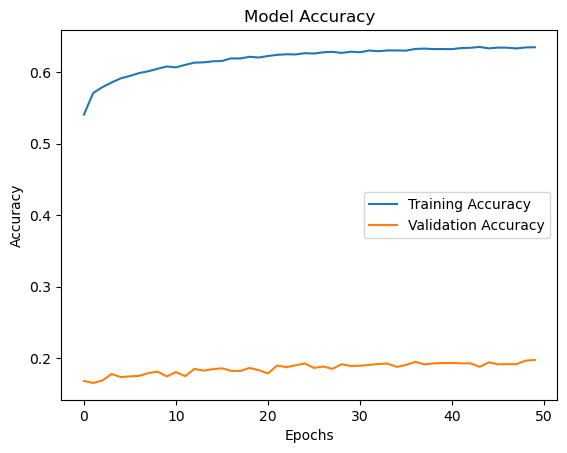

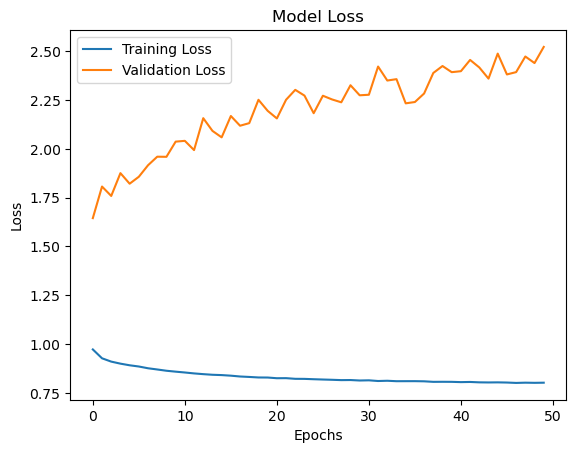

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


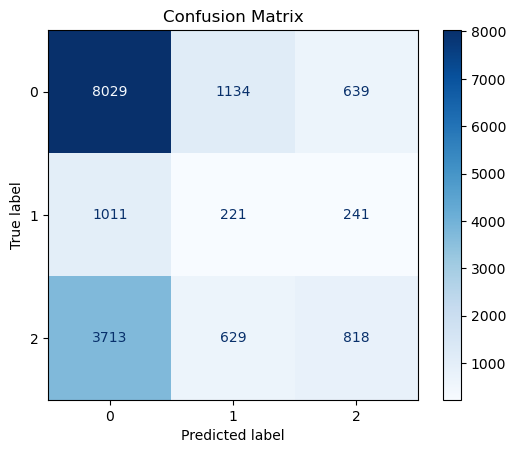

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [23]:
from collections import Counter

# Class distribution before SMOTE
print("Class Distribution Before SMOTE:", Counter(y_train))

# Class distribution after SMOTE
print("Class Distribution After SMOTE:", Counter(y_train_res.argmax(axis=1)))  # Convert one-hot to labels


Class Distribution Before SMOTE: Counter({0: 29407, 2: 15478, 1: 4418})
Class Distribution After SMOTE: Counter({0: 29407, 2: 29407, 1: 29407})


color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.


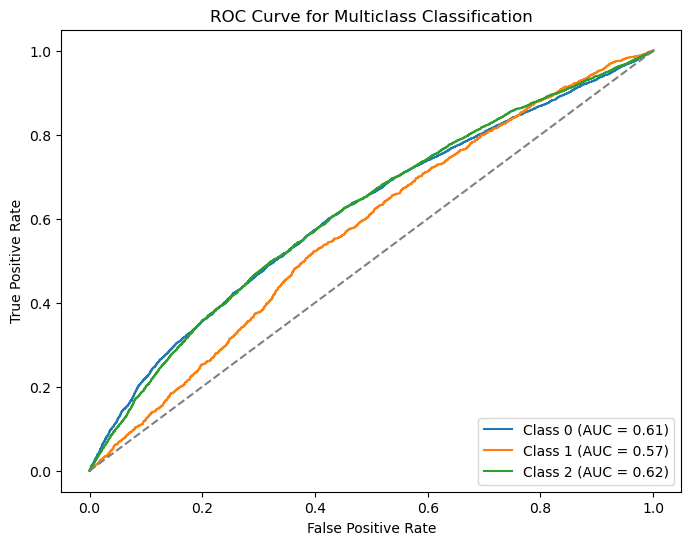

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the test labels for ROC curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', color='gray')  # Diagonal line
plt.title('ROC Curve for Multiclass Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


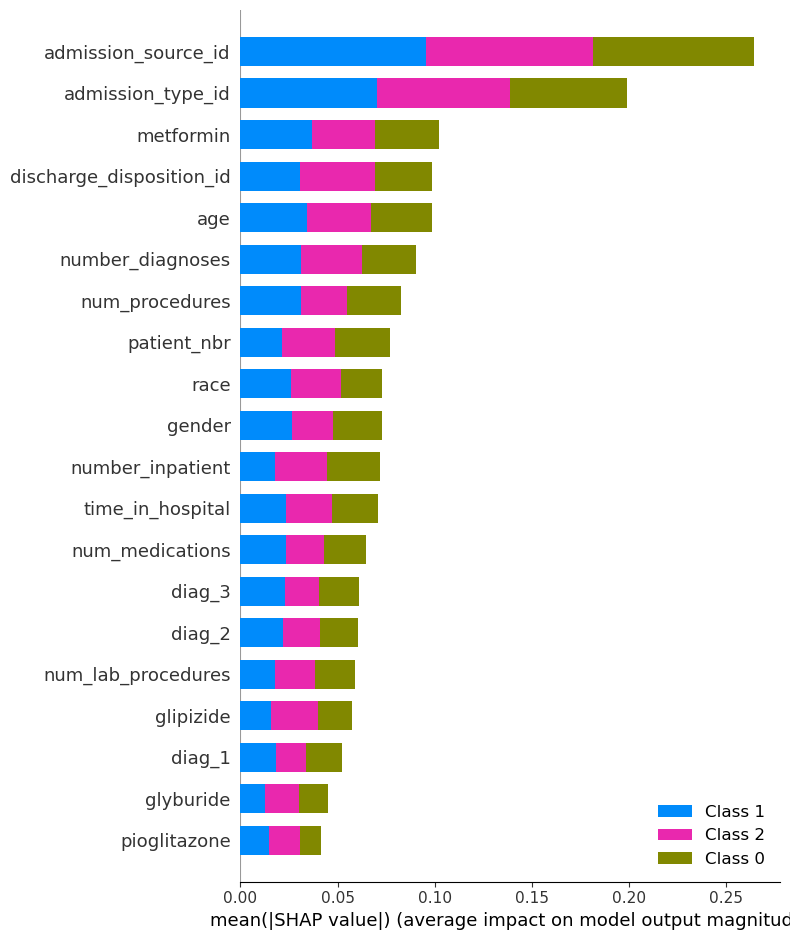

In [24]:
import shap

explainer = shap.DeepExplainer(model, X_train_res[:100])  # Use a subset of the training data
shap_values = explainer.shap_values(X_test[:100])

# Summary plot
shap.summary_plot(shap_values, X_test[:100], feature_names=X.columns)


In [36]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score



# here i changed the number of target labels from 3 to 2 for better prediction. after this there is an increase in accuracy but not by a huge margin

# Combine labels 1 and 2 into label 1 for binary classification
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x in [1, 2] else 0)

# Define features (X) and target (y)
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=128,
                    verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



#Here’s a more concise summary:

#1. **Data Preprocessing**: Combines target labels `1` and `2` into `1` for binary classification. Features are scaled using **StandardScaler**.

#2. **Model**: A **deep learning model** with 3 hidden layers (64, 32, 16 units), **ReLU** activations, and **Dropout** for regularization. **Sigmoid** output for binary classification.

#3. **Training**: Uses **Adam optimizer**, **binary cross-entropy** loss, and trains for **50 epochs** with a batch size of **128**.

#4. **Evaluation**: Reports **accuracy** and **classification metrics** (precision, recall, F1-score).

Epoch 1/50
309/309 [==============================] - 2s 3ms/step - loss: 0.6742 - accuracy: 0.5940 - val_loss: 0.6547 - val_accuracy: 0.6224
Epoch 2/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6624 - accuracy: 0.6111 - val_loss: 0.6518 - val_accuracy: 0.6268
Epoch 3/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6586 - accuracy: 0.6155 - val_loss: 0.6516 - val_accuracy: 0.6265
Epoch 4/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6555 - accuracy: 0.6183 - val_loss: 0.6505 - val_accuracy: 0.6285
Epoch 5/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6535 - accuracy: 0.6210 - val_loss: 0.6488 - val_accuracy: 0.6298
Epoch 6/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6533 - accuracy: 0.6200 - val_loss: 0.6496 - val_accuracy: 0.6289
Epoch 7/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6518 - accuracy: 0.6224 - val_loss: 0.6472 - val_accuracy: 0.6307
Epoch 

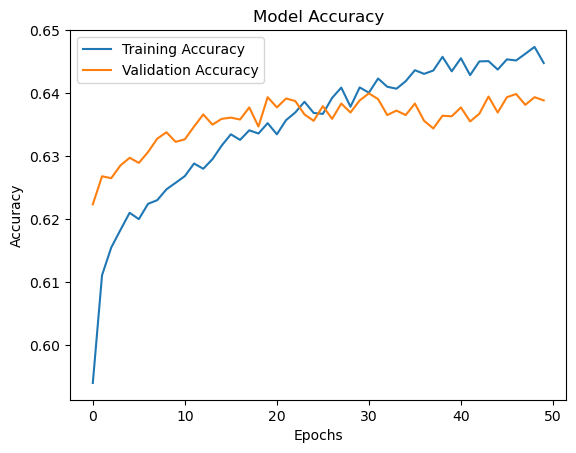

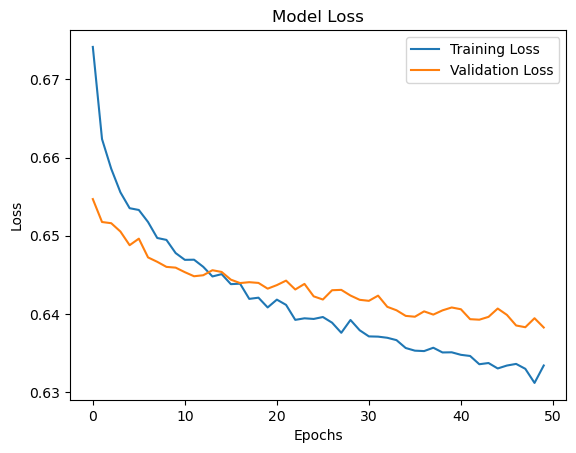

In [37]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [38]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class Weights:", class_weights_dict)

history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=128,
                    verbose=1,
                    class_weight=class_weights_dict)


Class Weights: {0: 0.8375462915774811, 1: 1.2406391545042779}
Epoch 1/50
309/309 [==============================] - 2s 4ms/step - loss: 0.6506 - accuracy: 0.6298 - val_loss: 0.6554 - val_accuracy: 0.6099
Epoch 2/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6507 - accuracy: 0.6230 - val_loss: 0.6596 - val_accuracy: 0.6089
Epoch 3/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6501 - accuracy: 0.6245 - val_loss: 0.6547 - val_accuracy: 0.6169
Epoch 4/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6485 - accuracy: 0.6258 - val_loss: 0.6553 - val_accuracy: 0.6159
Epoch 5/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6493 - accuracy: 0.6272 - val_loss: 0.6633 - val_accuracy: 0.6031
Epoch 6/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6502 - accuracy: 0.6244 - val_loss: 0.6551 - val_accuracy: 0.6130
Epoch 7/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6497 - acc

In [40]:
# training without weights
history_without_weights = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    verbose=1
)


Epoch 1/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6260 - accuracy: 0.6513 - val_loss: 0.6370 - val_accuracy: 0.6380
Epoch 2/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6234 - accuracy: 0.6569 - val_loss: 0.6381 - val_accuracy: 0.6338
Epoch 3/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6257 - accuracy: 0.6547 - val_loss: 0.6379 - val_accuracy: 0.6342
Epoch 4/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6261 - accuracy: 0.6528 - val_loss: 0.6367 - val_accuracy: 0.6384
Epoch 5/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6236 - accuracy: 0.6535 - val_loss: 0.6372 - val_accuracy: 0.6344
Epoch 6/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6253 - accuracy: 0.6505 - val_loss: 0.6374 - val_accuracy: 0.6347
Epoch 7/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6242 - accuracy: 0.6525 - val_loss: 0.6370 - val_accuracy: 0.6332
Epoch 

In [41]:
# training with weights
history_with_weights = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    verbose=1,
    class_weight=class_weights_dict
)


Epoch 1/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6383 - accuracy: 0.6433 - val_loss: 0.6549 - val_accuracy: 0.6063
Epoch 2/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6387 - accuracy: 0.6373 - val_loss: 0.6532 - val_accuracy: 0.6076
Epoch 3/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6384 - accuracy: 0.6342 - val_loss: 0.6557 - val_accuracy: 0.6078
Epoch 4/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6370 - accuracy: 0.6398 - val_loss: 0.6604 - val_accuracy: 0.6010
Epoch 5/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6378 - accuracy: 0.6375 - val_loss: 0.6539 - val_accuracy: 0.6099
Epoch 6/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6376 - accuracy: 0.6404 - val_loss: 0.6575 - val_accuracy: 0.6091
Epoch 7/50
309/309 [==============================] - 1s 3ms/step - loss: 0.6378 - accuracy: 0.6404 - val_loss: 0.6604 - val_accuracy: 0.6029
Epoch 

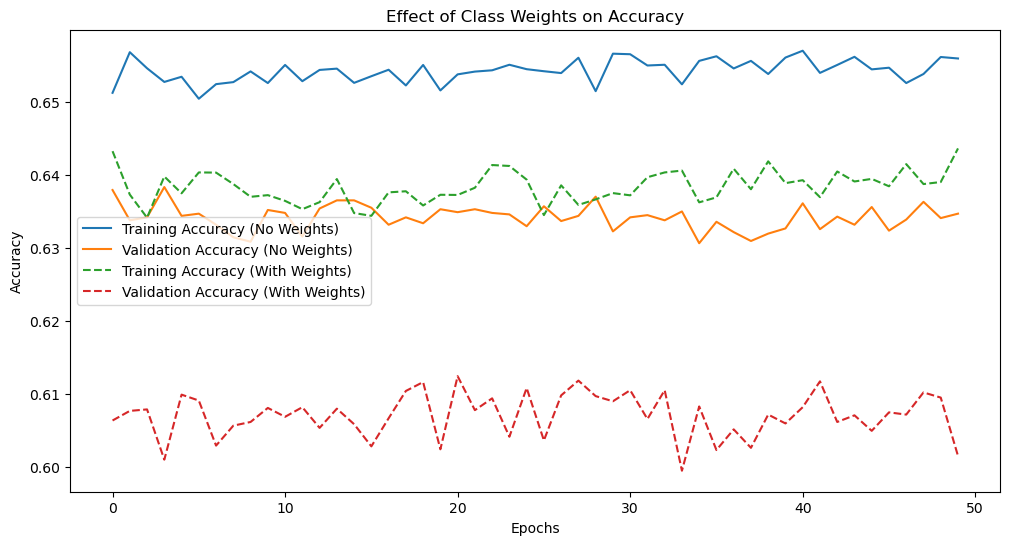

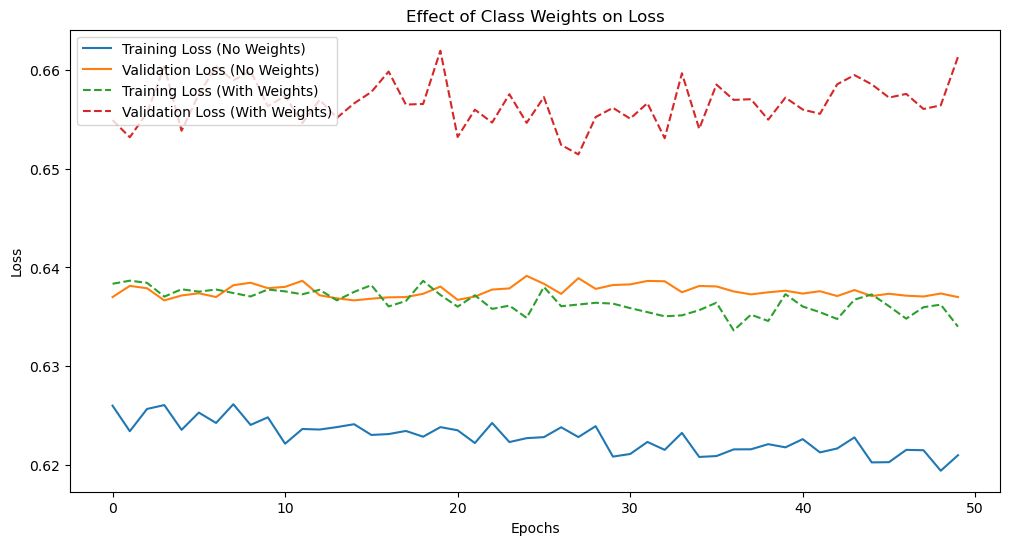

In [42]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_without_weights.history['accuracy'], label='Training Accuracy (No Weights)')
plt.plot(history_without_weights.history['val_accuracy'], label='Validation Accuracy (No Weights)')
plt.plot(history_with_weights.history['accuracy'], label='Training Accuracy (With Weights)', linestyle='--')
plt.plot(history_with_weights.history['val_accuracy'], label='Validation Accuracy (With Weights)', linestyle='--')
plt.title('Effect of Class Weights on Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_without_weights.history['loss'], label='Training Loss (No Weights)')
plt.plot(history_without_weights.history['val_loss'], label='Validation Loss (No Weights)')
plt.plot(history_with_weights.history['loss'], label='Training Loss (With Weights)', linestyle='--')
plt.plot(history_with_weights.history['val_loss'], label='Validation Loss (With Weights)', linestyle='--')
plt.title('Effect of Class Weights on Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


514/514 [==============================] - 1s 1ms/step


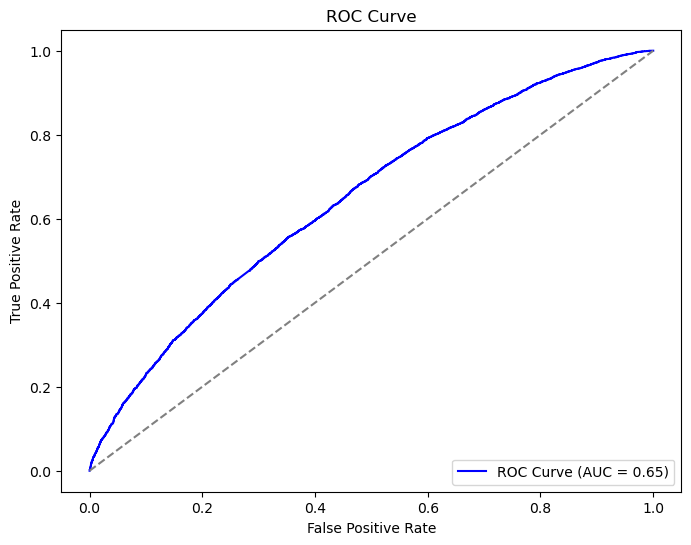

In [39]:
from sklearn.metrics import roc_curve, auc

# Predicted probabilities
y_proba = model.predict(X_test_scaled).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [43]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Compute class weights (optional if using SMOTE)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_resampled),
    y=y_resampled
)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_resampled), class_weights)}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled,
    test_size=0.25,
    random_state=42,
    stratify=y_resampled
)

# Define the model
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=128,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict(X_test))
print(f"Model Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(classification_report(y_test, y_pred))


#Here are 4-5 key points about the model:

#1. *Deep Neural Network Architecture*: The model uses a feedforward neural network with multiple layers (256, 128, 64 neurons), employing ReLU activation functions and L2 regularization to reduce overfitting.

#2. *Batch Normalization and Dropout*: Batch normalization is applied after each dense layer to improve convergence speed and stability. Dropout is also used to prevent overfitting by randomly setting a fraction of input units to 0 during training.

#3. *SMOTE for Imbalanced Data*: SMOTE (Synthetic Minority Over-sampling Technique) is used to balance the dataset by generating synthetic samples for the minority class (readmitted patients).

#4. *Class Weighting and Optimizer*: The Adam optimizer with a learning rate of 0.0005 is used, and class weights are computed to handle class imbalance, although SMOTE may already help mitigate this.

#5. *Callbacks for Model Optimization*: Early stopping and learning rate reduction on plateau are used to prevent overfitting and improve model convergence by adjusting the learning rate if validation performance plateaus.

Epoch 1/100
460/460 [==============================] - 4s 5ms/step - loss: 1.9597 - accuracy: 0.5663 - val_loss: 1.2355 - val_accuracy: 0.5987 - lr: 5.0000e-04
Epoch 2/100
460/460 [==============================] - 2s 5ms/step - loss: 1.0036 - accuracy: 0.5993 - val_loss: 0.8311 - val_accuracy: 0.6145 - lr: 5.0000e-04
Epoch 3/100
460/460 [==============================] - 2s 5ms/step - loss: 0.7729 - accuracy: 0.6102 - val_loss: 0.7185 - val_accuracy: 0.6215 - lr: 5.0000e-04
Epoch 4/100
460/460 [==============================] - 2s 5ms/step - loss: 0.7064 - accuracy: 0.6169 - val_loss: 0.6850 - val_accuracy: 0.6254 - lr: 5.0000e-04
Epoch 5/100
460/460 [==============================] - 3s 6ms/step - loss: 0.6836 - accuracy: 0.6224 - val_loss: 0.6731 - val_accuracy: 0.6280 - lr: 5.0000e-04
Epoch 6/100
460/460 [==============================] - 3s 6ms/step - loss: 0.6753 - accuracy: 0.6255 - val_loss: 0.6679 - val_accuracy: 0.6308 - lr: 5.0000e-04
Epoch 7/100
460/460 [===================

Of these 37 here are two examples of how data processing was handled.

race: Caucasian, Asian, African American, Hispanic, and other [0,1,2,3,4] if "?" of "nAn" or "Null" we set to the AVG

gender: male, female, unkown [0,1,2] if "?" or "nAn" or "Null" we set to the AVG.



IGNORE EVERYTHING AFTER HERE

gend()
plt.show()


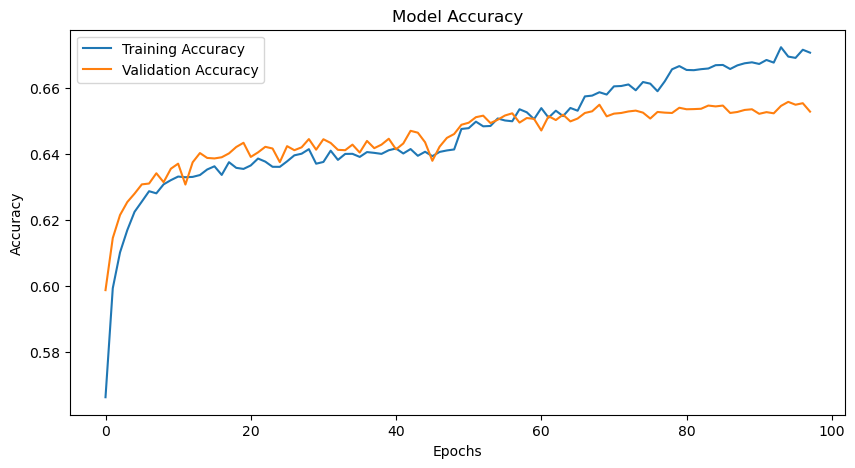

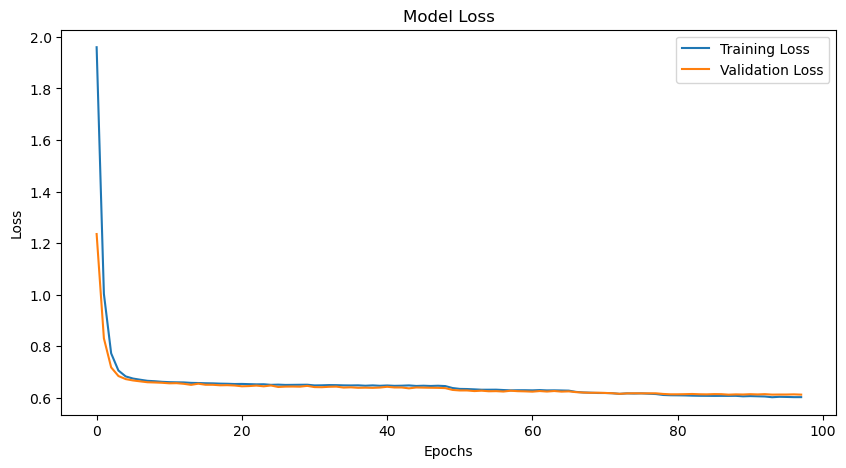

In [44]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



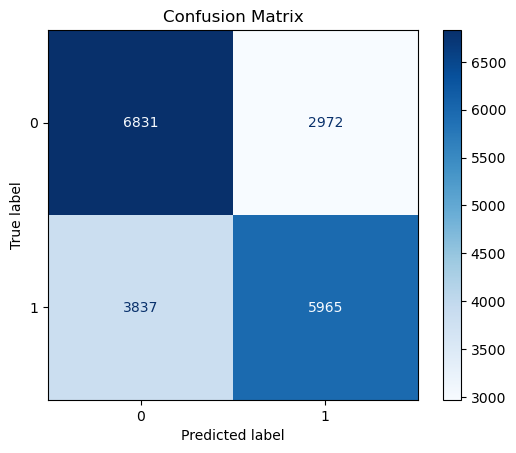

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


613/613 [==============================] - 1s 2ms/step


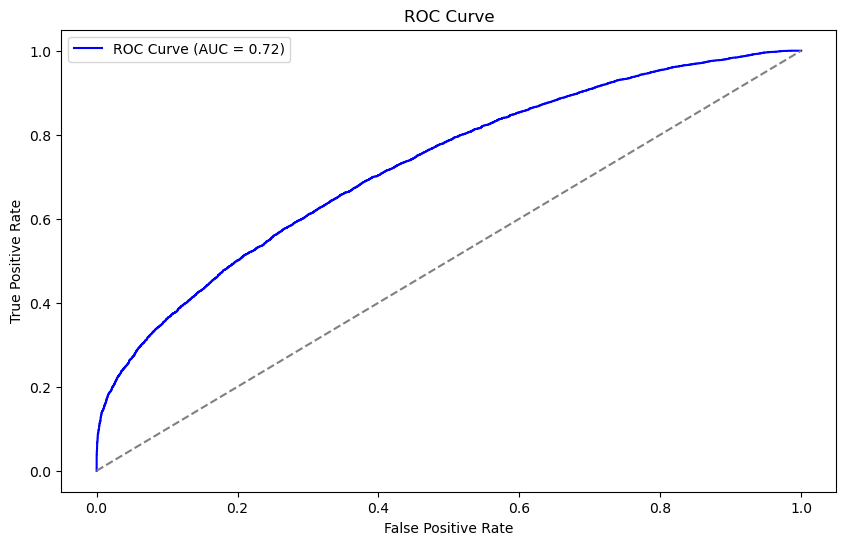

In [48]:
from sklearn.metrics import roc_curve, auc

# Predicted probabilities
y_proba = model.predict(X_test).ravel()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Epoch 1/50
460/460 [==============================] - 2s 5ms/step - loss: 0.6006 - accuracy: 0.6728 - val_loss: 0.6126 - val_accuracy: 0.6545 - lr: 3.9063e-06
Epoch 2/50
460/460 [==============================] - 2s 5ms/step - loss: 0.6016 - accuracy: 0.6717 - val_loss: 0.6125 - val_accuracy: 0.6540 - lr: 3.9063e-06
Epoch 3/50
460/460 [==============================] - 2s 5ms/step - loss: 0.6016 - accuracy: 0.6705 - val_loss: 0.6126 - val_accuracy: 0.6547 - lr: 3.9063e-06
Epoch 4/50
460/460 [==============================] - 2s 5ms/step - loss: 0.6021 - accuracy: 0.6703 - val_loss: 0.6125 - val_accuracy: 0.6548 - lr: 3.9063e-06
Epoch 5/50
460/460 [==============================] - 2s 5ms/step - loss: 0.6027 - accuracy: 0.6710 - val_loss: 0.6126 - val_accuracy: 0.6538 - lr: 3.9063e-06
Epoch 6/50
454/460 [============================>.] - ETA: 0s - loss: 0.6011 - accuracy: 0.6705
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
460/460 [=======================

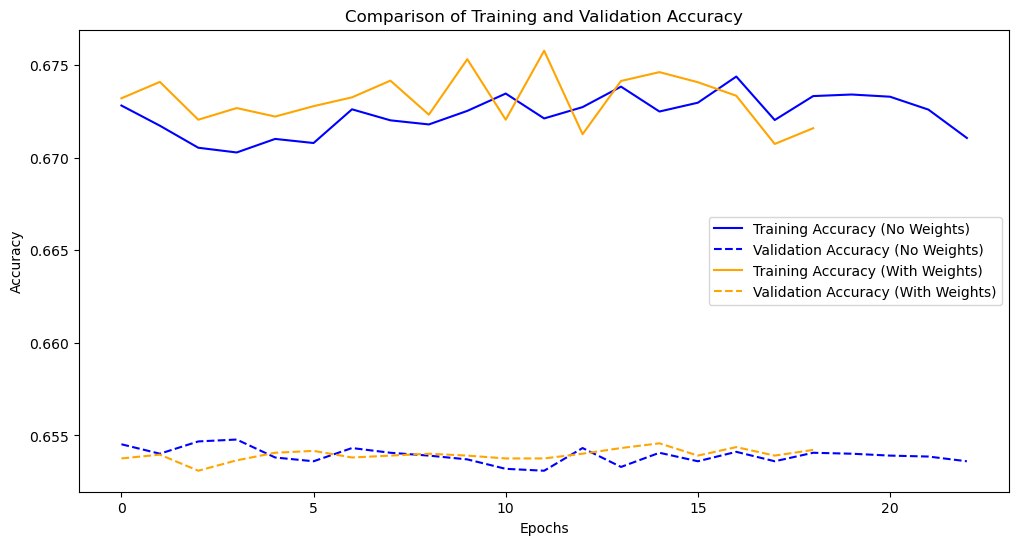

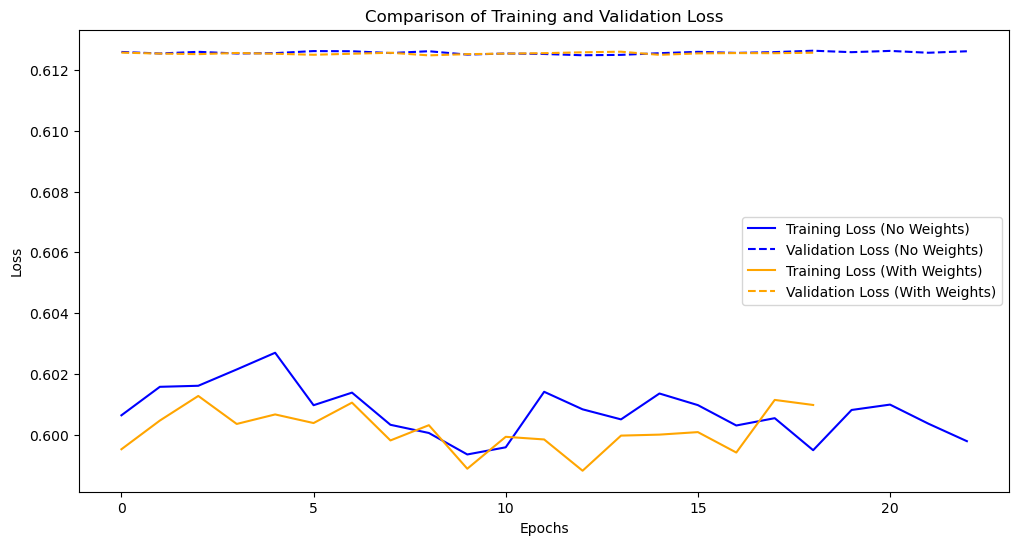

Epoch 1/100
460/460 [==============================] - 2s 5ms/step - loss: 0.6012 - accuracy: 0.6727 - val_loss: 0.6125 - val_accuracy: 0.6538 - lr: 1.0000e-06
Epoch 2/100
460/460 [==============================] - 2s 5ms/step - loss: 0.6006 - accuracy: 0.6712 - val_loss: 0.6125 - val_accuracy: 0.6540 - lr: 1.0000e-06
Epoch 3/100
460/460 [==============================] - 2s 5ms/step - loss: 0.6000 - accuracy: 0.6714 - val_loss: 0.6125 - val_accuracy: 0.6538 - lr: 1.0000e-06
Epoch 4/100
460/460 [==============================] - 2s 5ms/step - loss: 0.6005 - accuracy: 0.6736 - val_loss: 0.6125 - val_accuracy: 0.6542 - lr: 1.0000e-06
Epoch 5/100
460/460 [==============================] - 2s 5ms/step - loss: 0.6023 - accuracy: 0.6724 - val_loss: 0.6125 - val_accuracy: 0.6540 - lr: 1.0000e-06
Epoch 6/100
460/460 [==============================] - 2s 5ms/step - loss: 0.5991 - accuracy: 0.6738 - val_loss: 0.6126 - val_accuracy: 0.6540 - lr: 1.0000e-06
Epoch 7/100
460/460 [===================

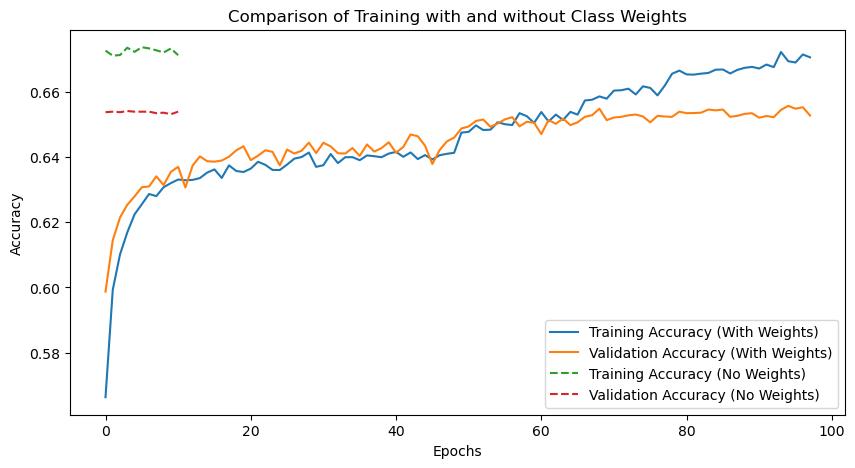

In [49]:
# Train without class weights
history_no_weights = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=128,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

# Train with class weights
history_with_weights = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=128,
    class_weight=class_weights_dict,  # Add class weights here
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

# Plot comparison of accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history_no_weights.history['accuracy'], label='Training Accuracy (No Weights)', color='blue')
plt.plot(history_no_weights.history['val_accuracy'], label='Validation Accuracy (No Weights)', linestyle='--', color='blue')
plt.plot(history_with_weights.history['accuracy'], label='Training Accuracy (With Weights)', color='orange')
plt.plot(history_with_weights.history['val_accuracy'], label='Validation Accuracy (With Weights)', linestyle='--', color='orange')
plt.title('Comparison of Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot comparison of loss
plt.figure(figsize=(12, 6))
plt.plot(history_no_weights.history['loss'], label='Training Loss (No Weights)', color='blue')
plt.plot(history_no_weights.history['val_loss'], label='Validation Loss (No Weights)', linestyle='--', color='blue')
plt.plot(history_with_weights.history['loss'], label='Training Loss (With Weights)', color='orange')
plt.plot(history_with_weights.history['val_loss'], label='Validation Loss (With Weights)', linestyle='--', color='orange')
plt.title('Comparison of Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Train without class weights
history_no_weights = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=128,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

# Plot comparison
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy (With Weights)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (With Weights)')
plt.plot(history_no_weights.history['accuracy'], label='Training Accuracy (No Weights)', linestyle='--')
plt.plot(history_no_weights.history['val_accuracy'], label='Validation Accuracy (No Weights)', linestyle='--')
plt.title('Comparison of Training with and without Class Weights')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


    verbose=1
)


from sklearn.metrics import roc_curve

y_proba = model.predict(X_test).ravel()  # Predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
import shap

explainer = shap.DeepExplainer(model, X_train[:100])  # Use a subset for performance
shap_values = explainer.shap_values(X_test[:100])

# Summary plot
shap.summary_plot(shap_values, X_test[:100])


# Exploration of dataset processing for more accurate modeling:

If we dropped all null values from the feature vector we go from above 100,000 rows of data to only 298, over a 99% reduction in data

In [15]:
x_inputs_no_null = x_inputs.dropna()

NameError: name 'x_inputs' is not defined

In [ ]:
x_inputs_no_null

The diabetes dataset has missing values, indicated by "?" in the data file (not by "1" as the documentation page incorrectly indicates): you will need to figure out how to handle missing values, e.g., remove rows or remove columns with missing values, replace missing values with default values (e.g., mean or median for the column), or handle missing values directly in your classifier (decision trees can do this for example). You could also (optionally) compare the effect on classifier accuracy of different approaches for handling missing values.

In [ ]:
seed = 1234

# Gradient Boosted Decision Tree

In [ ]:
ensemble_model = GradientBoostingClassifier(max_depth=4, n_estimators = 400)
ensemble_model.fit(X_tr, y_tr)

y_tr_pred = ensemble_model.predict(X_tr)
training_error = 1 - accuracy_score(y_tr, y_tr_pred)

y_te_pred = ensemble_model.predict(X_te)
testing_error = 1 - accuracy_score(y_te, y_te_pred)
print("Gradient Boost Classifier with manually filtered dataset ")
print(f"Training Set Error: {training_error:.4f}")
print(f"Testing Set Error: {testing_error:.4f}")

# Logistic Regression Classifier and MLP Classifier

In [ ]:
# Perform standardization on the input features
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

# Train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(1024,), activation='relu', solver='sgd', learning_rate_init=0.001, batch_size=256,alpha = 0.5)
mlp.fit(X_tr, y_tr)

# Calculate MLP training and test errors
mlp_tr_error = 1 - mlp.score(X_tr, y_tr)
mlp_te_error = 1 - mlp.score(X_te, y_te)

# Train logistic regression classifier
logreg = LogisticRegression()
logreg.fit(X_tr, y_tr)

# Calculate logistic regression training and test errors
lreg_tr_error = 1 - logreg.score(X_tr, y_tr)
lreg_te_error = 1 - logreg.score(X_te, y_te)

# Print the errors
print("MLP Training Error:", mlp_tr_error)
print("MLP Test Error:", mlp_te_error)
print("Logistic Regression Training Error:", lreg_tr_error)
print("Logistic Regression Test Error:", lreg_te_error)


In [ ]:
# Train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(1024,), activation='relu', solver='adam', learning_rate_init=0.001, batch_size=256,alpha = 0.5)
mlp.fit(X_tr, y_tr)

# Calculate MLP training and test errors
mlp_tr_error = 1 - mlp.score(X_tr, y_tr)
mlp_te_error = 1 - mlp.score(X_te, y_te)

# Train logistic regression classifier
logreg = LogisticRegression(solver='liblinear',C=1.5, max_iter=1000)
logreg.fit(X_tr, y_tr)

# Calculate logistic regression training and test errors
lreg_tr_error = 1 - logreg.score(X_tr, y_tr)
lreg_te_error = 1 - logreg.score(X_te, y_te)

# Print the errors
print("MLP Training Error:", mlp_tr_error)
print("MLP Test Error:", mlp_te_error)
print("Logistic Regression Training Error:", lreg_tr_error)
print("Logistic Regression Test Error:", lreg_te_error)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
def compute_confusion_matrix(y, y_pred):
    conf_matrix = np.zeros((3,3))
    for i in range(len(y)):
        pred = y_pred[i]
        actual = y[i]
        conf_matrix[actual][pred] += 1
    return conf_matrix

#prepare y with int values
y_te_matrix = y_te
y_te_matrix.replace( 2, '>30', inplace = True)
y_te_matrix.replace(1, '<30', inplace = True)
y_te_matrix.replace(0,'NO', inplace = True)


y_te_pred_matrix = pd.DataFrame(y_te_pred)
y_te_pred_matrix.replace( 2, '>30', inplace = True)
y_te_pred_matrix.replace(1, '<30', inplace = True)
y_te_pred_matrix.replace(0,'NO', inplace = True)

sklearn_cm = confusion_matrix(y_te_matrix, y_te_pred_matrix, labels = ['NO', '<30', '>30'])
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();
